# Air Polution Challenge
### Iris Winkler, Carlos Duque, Johannes Gooth

neuefische can-ds-24-2


#### Project – Short Description
Zini Air Pollution Challenge to predict air quality (PM2.5 concentration) in various cities around the world using satellite data. For more detailed information please see README.

## Set-Up the Working Environment

In [1]:
import sys
import os
# setting path
sys.path.append('../')
# sys.path.append(os.path.abspath('src'))


from src import *


In [2]:
# Avoid restarting Kernel 
%load_ext autoreload
%autoreload 2



# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.colors import ListedColormap


# from src import preprocessing
# from src import evaluation
# from src import train
# from src import visualization


from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet #maybe we don't need this
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.preprocessing import PolynomialFeatures

# Set random seed 
RSEED = 7
warnings.filterwarnings("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
#Plot correlation and paiplot
# Set global variables for plots
# plt.style.use('fivethirtyeight')
# sns.set_color_codes('bright')
plt.rcParams["figure.figsize"] = (15, 10)

## Import the Data

In [4]:
# Import the data into a Pandas DataFrame
df_train = pd.read_csv('../data/Train.csv')
df_test = pd.read_csv('../data/Test.csv')

## Quick Look at the Data

In [5]:
# Display first 5 rows of the train DataFrame
df_train.head()

Place_ID X Date        Date Place_ID  target  target_min  target_max   
0  010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0        53.0  \
1  010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0        63.0   
2  010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0        56.0   
3  010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0        55.0   
4  010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0        52.0   

   target_variance  target_count  precipitable_water_entire_atmosphere   
0           769.50            92                             11.000000  \
1          1319.85            91                             14.600000   
2          1181.96            96                             16.400000   
3          1113.67            96                              6.911948   
4          1164.82            95                             13.900001   

   relative_humidity_2m_above_ground  ...  L3_SO2_sensor_zenith_angle   
0                          60.200001  ...                   38.593017  \
1                          48.799999  ...                   59.624912   
2                          33.400002  ...                   49.839714   
3                          21.300001  ...                   29.181258   
4                          44.700001  ...                    0.797294   

   L3_SO2_solar_azimuth_angle  L3_SO2_solar_zenith_angle   
0                  -61.752587                  22.363665  \
1                  -67.693509                  28.614804   
2                  -78.342701                  34.296977   
3                  -73.896588                  30.545446   
4                  -68.612480                  26.899694   

   L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height   
0                                    1793.793579            3227.855469  \
1                                    1789.960449            3384.226562   
2                                            NaN                    NaN   
3                                            NaN                    NaN   
4                                            NaN                    NaN   

   L3_CH4_aerosol_optical_depth  L3_CH4_sensor_azimuth_angle   
0                      0.010579                    74.481049  \
1                      0.015104                    75.630043   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

   L3_CH4_sensor_zenith_angle  L3_CH4_solar_azimuth_angle   
0                   37.501499                  -62.142639  \
1                   55.657486                  -53.868134   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   L3_CH4_solar_zenith_angle  
0                  22.545118  
1                  19.293652  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 82 columns]

In [6]:
# Display first 5 rows of the test DataFrame
df_test.head()

Place_ID X Date        Date Place_ID   
0  0OS9LVX X 2020-01-02  2020-01-02  0OS9LVX  \
1  0OS9LVX X 2020-01-03  2020-01-03  0OS9LVX   
2  0OS9LVX X 2020-01-04  2020-01-04  0OS9LVX   
3  0OS9LVX X 2020-01-05  2020-01-05  0OS9LVX   
4  0OS9LVX X 2020-01-06  2020-01-06  0OS9LVX   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground   
0                             11.600000                          30.200001  \
1                             18.300001                          42.900002   
2                             17.600000                          41.299999   
3                             15.011948                          53.100002   
4                              9.700000                          71.599998   

   specific_humidity_2m_above_ground  temperature_2m_above_ground   
0                            0.00409                    14.656824  \
1                            0.00595                    15.026544   
2                            0.00590                    15.511041   
3                            0.00709                    14.441858   
4                            0.00808                    11.896295   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground   
0                              3.956377                              0.712605  \
1                              4.230430                              0.661892   
2                              5.245728                              1.640559   
3                              5.454001                             -0.190532   
4                              3.511787                             -0.279441   

   L3_NO2_NO2_column_number_density  ...  L3_SO2_sensor_zenith_angle   
0                          0.000053  ...                    1.445658  \
1                          0.000050  ...                   34.641758   
2                          0.000050  ...                   55.872276   
3                          0.000055  ...                   59.174188   
4                          0.000055  ...                   40.925873   

   L3_SO2_solar_azimuth_angle  L3_SO2_solar_zenith_angle   
0                  -95.984984                  22.942019  \
1                  -95.014908                  18.539116   
2                  -94.015418                  14.140820   
3                  -97.247602                  32.730553   
4                  -96.057265                  28.320527   

   L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height   
0                                            NaN                    NaN  \
1                                            NaN                    NaN   
2                                            NaN                    NaN   
3                                            NaN                    NaN   
4                                    1831.261597            3229.118652   

   L3_CH4_aerosol_optical_depth  L3_CH4_sensor_azimuth_angle   
0                           NaN                          NaN  \
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                      0.031068                  -100.278343   

   L3_CH4_sensor_zenith_angle  L3_CH4_solar_azimuth_angle   
0                         NaN                         NaN  \
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                    41.84708                  -95.910744   

   L3_CH4_solar_zenith_angle  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                  28.498789  

[5 rows x 77 columns]

## Train-Test Split
The test_df holds the final evaluation dataset for the Air Pollution challenge. To ensure that we do not use this data until our final model is ready, we will also divide the train_df into training and testing subsets. This will allow us to assess our models effectively during the optimization process:

In [7]:
# Define your features and target variable
X = df_train.drop('target', axis=1)  # Features (all columns except 'not.fully.paid')
y = df_train['target']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

# Checking the dimensions of the splits
print("Training set features shape:", X_train.shape)
print("Training set target shape:", y_train.shape)
print("Testing set features shape:", X_test.shape)
print("Testing set target shape:", y_test.shape)

Training set features shape: (21389, 81)
Training set target shape: (21389,)
Testing set features shape: (9168, 81)
Testing set target shape: (9168,)


## Explore the Data

### Shape of the DataFrames

In [8]:
# Shape of the train DataFrame
X_train.shape

(21389, 81)

The train DataFrame has 81 columns and 30557 rows.

In [9]:
# Shape of the test DataFrame
df_test.shape

(16136, 77)

The test DataFrame has 77 columns and 16136 rows. 

Thus, the train and test DataFrames have differnt columns. We will analyze the differences between the columns of two the DataFrames by comparing their column names:

In [10]:
# Get sets of column names for both DataFrames
columns_X_train = set(X_train.columns)
columns_df_test = set(df_test.columns)
    
# Find columns that are unique to each DataFrame
unique_to_df_train = list(columns_X_train - columns_df_test)

print(unique_to_df_train)

['target_min', 'target_count', 'target_max', 'target_variance']


The SampleSubmission file clearly states that only the 'target' column is the target value of our model (aka the amount of Pm2.5) and should be predicted.  Therefore, 'target_variance', 'target_count', 'target_max', 'target_min' could only be considered as additional features. However, training a machine learning model on features that do not appear in the test data can lead to several issues and is generally not recommended. Here are some key points to consider:
1. Generalization Ability: The primary goal of a machine learning model is to generalize well from the training data to unseen data. If the model is trained on features that are not available in the test data, it might learn patterns that are not applicable when making predictions in real-world scenarios or during evaluation, leading to poor performance.
2. Overfitting: Training on features not present in the test set can cause the model to overfit to the training data. Overfitting occurs when a model learns noise or irrelevant details in the training data instead of capturing the underlying patterns applicable more broadly. This typically results in high accuracy on training data but poor accuracy on unseen (test) data.
3. Feature Relevance: Features used in training should ideally be representative of the data the model will ultimately work with, including the test set and any real-world application data. Features that do not appear in the test set might not be relevant or available when the model is deployed, making them practically useless and potentially misleading during the training phase.
4. Model Complexity: Including irrelevant or unavailable features increases the complexity of the model unnecessarily. This not only affects the model's efficiency but can also complicate the model maintenance and interpretability.
5. Resource Allocation: Training on irrelevant features consumes computational resources and time, which could be better spent on feature engineering, model tuning, or training with relevant features that improve the model's performance on the test set.

Therefore, we decided to drop the other unique columns.

### Columns in the DataFrames

Next, we will check the column names of our DataFrames:

In [11]:
# Columns in the dataframe
X_train.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target_min', 'target_max',
       'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3

Not all column names are lowercase and use underscores instead of spaces. To adhere to Python naming conventions, we'll convert all column names in the train and test DataFrames to lowercase and replace spaces with underscores.

More information about the column names can be found on https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p.

Next, we will identify the different datatypes present in our datasets:

### Datatypes

In [12]:
# Checking for the data-types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21389 entries, 15534 to 28847
Data columns (total 81 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      21389 non-null  object 
 1   Date                                                 21389 non-null  object 
 2   Place_ID                                             21389 non-null  object 
 3   target_min                                           21389 non-null  float64
 4   target_max                                           21389 non-null  float64
 5   target_variance                                      21389 non-null  float64
 6   target_count                                         21389 non-null  int64  
 7   precipitable_water_entire_atmosphere                 21389 non-null  float64
 8   relative_humidity_2m_above_ground                    21389 non-null

 | Data-Type | Result |
|:-|:-|
| *object* | There are three features (columns) with an object data-type in our dataset: 'Place ID X Date', 'Place ID' and 'Date'. This means, there are strings or mixed data-types in this column. <br> - Since 'Date' means the date when the measurement was performed, this needs to be changed into a datetime format. |
| *float65* | Floats are the data-types of the remaining features (columns). We consider rounding at a later stage.

Next, we will check for missing values in the dataset.

### Missing Values

In [13]:
# Checking for missing values ('NaN'/'None')
X_train.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target_min                          0
target_max                          0
                                ...  
L3_CH4_aerosol_optical_depth    17412
L3_CH4_sensor_azimuth_angle     17412
L3_CH4_sensor_zenith_angle      17412
L3_CH4_solar_azimuth_angle      17412
L3_CH4_solar_zenith_angle       17412
Length: 81, dtype: int64

<Axes: >

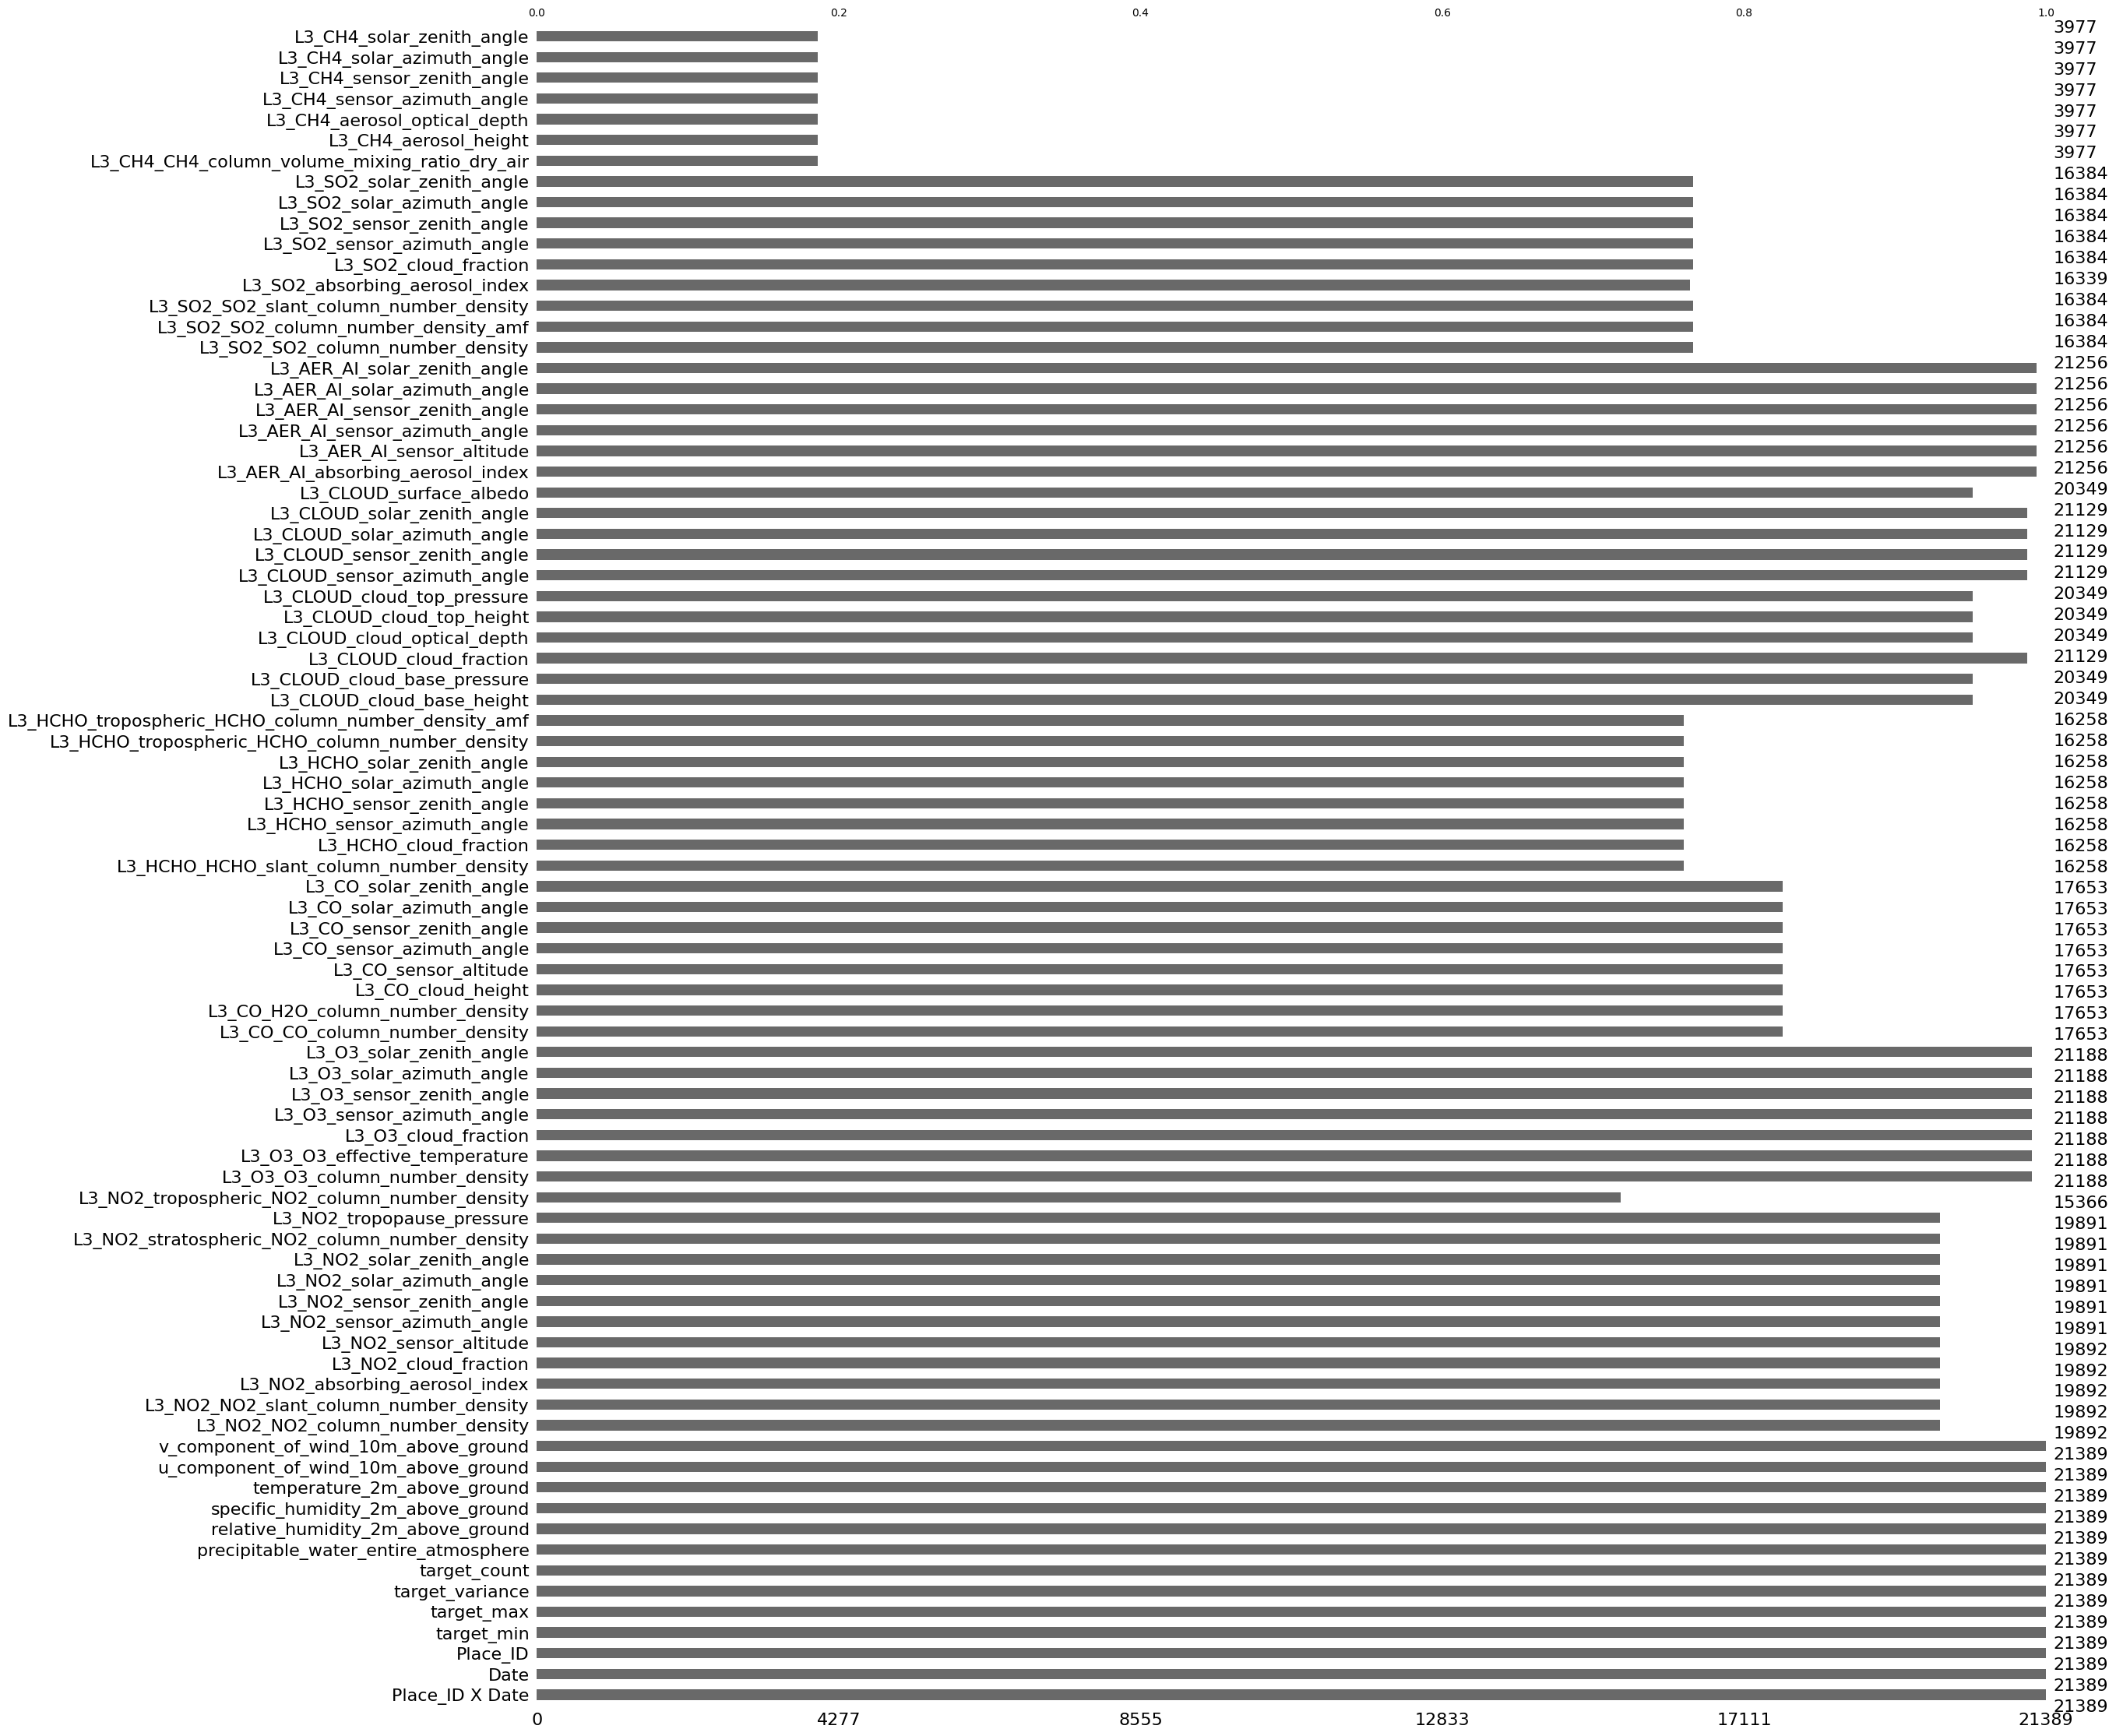

In [14]:
# plotting percentage of missing values per column
msno.bar(X_train)

<Axes: >

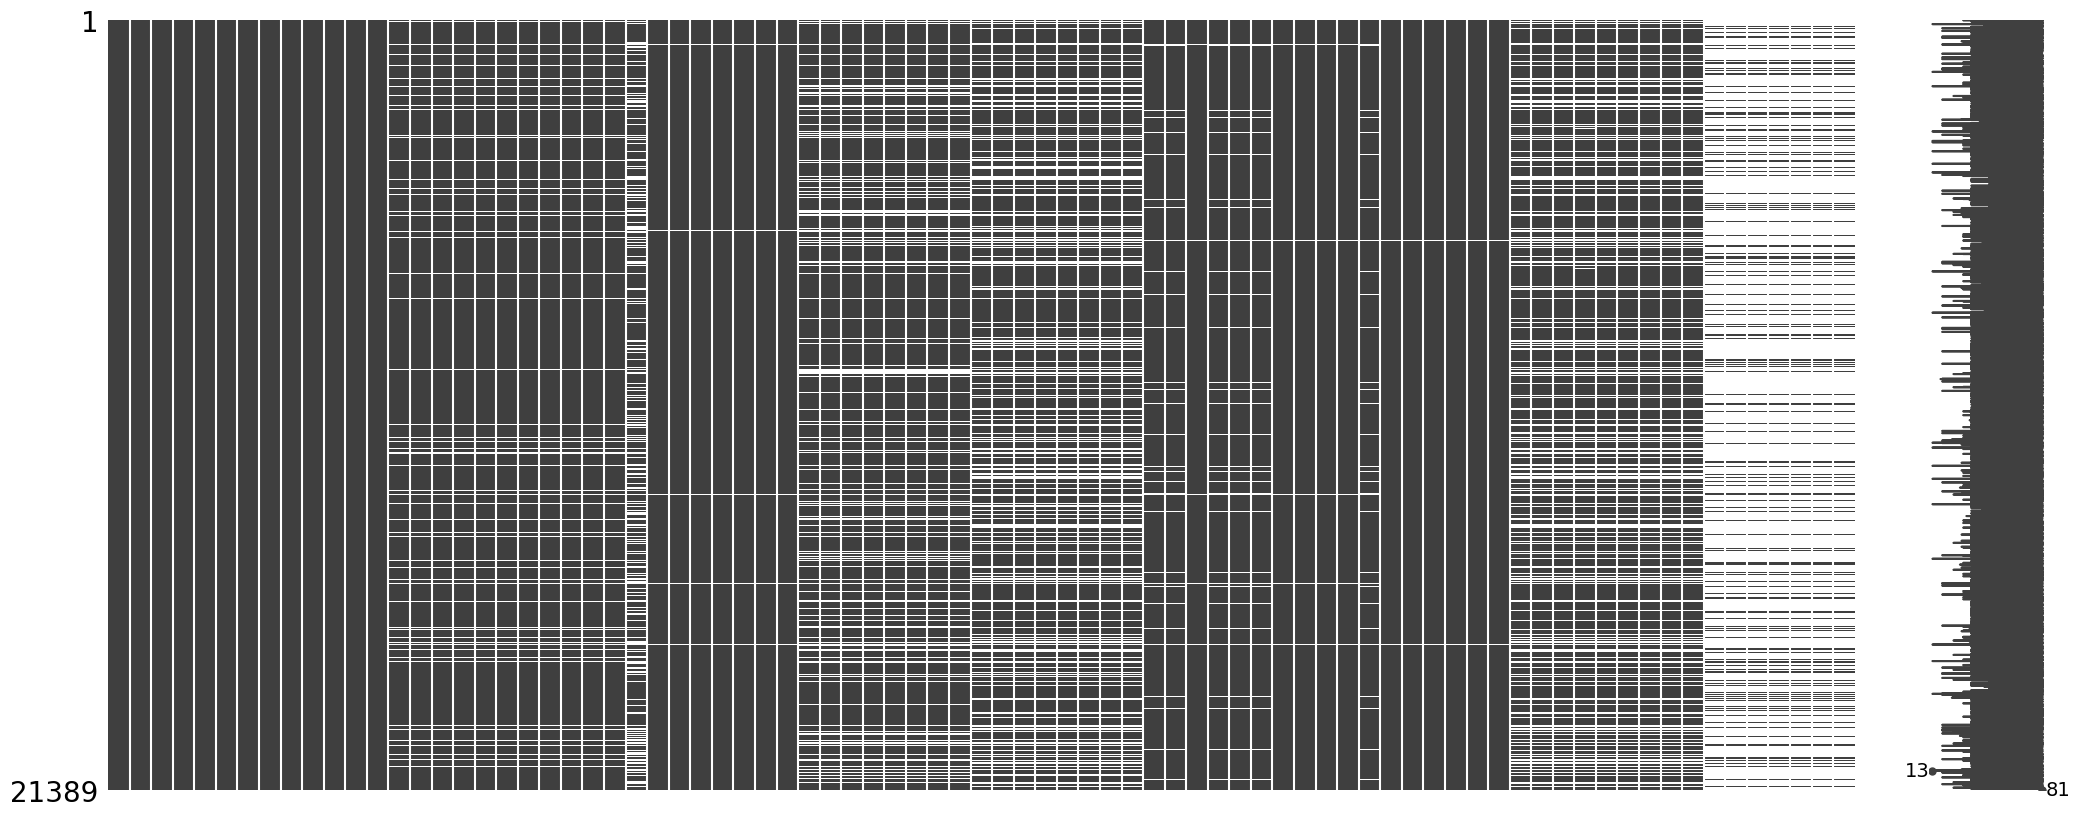

In [15]:
# plotting the matrix of missing values
msno.matrix(X_train)

There are few instances where missing values co-occur, and there appears to be no discernible pattern in the distribution of missing data. Consequently, it seems that the missing data occurs randomly.

We deliberated on whether to retain or discard columns containing missing values through a thorough examination of the scientific literature: **see notebook feature selection**

### 0-values

For features with 'angles' in their names, along with 'cloud_fraction' and 'weekday', zero values are permissible. However, in all other features, the presence of zero values may indicate an error.

To focus on columns where zero values might signify an error, we initially exclude columns that contain the word 'angle' in their headers:


In [16]:
# Create a new DataFrame without columns containing the word 'angle' and 'cloud_fraction'
df_filtered_noangle_nocloud = X_train[[col for col in X_train.columns if 'angle' not in col and 'cloud_fraction' not in col]]

print(df_filtered_noangle_nocloud)

            Place_ID X Date        Date Place_ID  target_min  target_max   
15534  GJOPSKI X 2020-02-12  2020-02-12  GJOPSKI        11.0       162.0  \
15205  G4CKKFV X 2020-02-14  2020-02-14  G4CKKFV         5.0       129.0   
9537   ARTRJ6I X 2020-03-24  2020-03-24  ARTRJ6I        21.0        50.0   
30134  YLLOKEY X 2020-02-02  2020-02-02  YLLOKEY         8.0        58.0   
21061  NW6MZ2E X 2020-01-20  2020-01-20  NW6MZ2E        30.0        85.0   
...                     ...         ...      ...         ...         ...   
5699   5QYHA81 X 2020-01-09  2020-01-09  5QYHA81         1.0        57.0   
10742  C39T5GU X 2020-01-24  2020-01-24  C39T5GU        42.0        99.0   
16921  HR0OKCA X 2020-03-04  2020-03-04  HR0OKCA        21.0        74.0   
25796  THZR2TS X 2020-01-04  2020-01-04  THZR2TS        82.0       190.0   
28847  WOIRN9J X 2020-01-22  2020-01-22  WOIRN9J        74.0       172.0   

       target_variance  target_count  precipitable_water_entire_atmosphere   
15534    

In [17]:
# Check for zeros in all columns and count them
zero_counts = (df_filtered_noangle_nocloud == 0).sum()

# Filter and print entries where the sum is not zero
non_zero_counts = zero_counts[zero_counts != 0]
print("Number of zeros in each column:")
print(non_zero_counts)

Number of zeros in each column:
target_variance                                          35
L3_NO2_NO2_column_number_density                       1840
L3_NO2_NO2_slant_column_number_density                 1840
L3_NO2_absorbing_aerosol_index                         1840
L3_NO2_sensor_altitude                                 1840
L3_NO2_stratospheric_NO2_column_number_density         1840
L3_NO2_tropopause_pressure                             1840
L3_NO2_tropospheric_NO2_column_number_density          1840
L3_O3_O3_column_number_density                          443
L3_O3_O3_effective_temperature                          443
L3_CO_CO_column_number_density                          222
L3_CO_H2O_column_number_density                         222
L3_CO_cloud_height                                      222
L3_CO_sensor_altitude                                   222
L3_HCHO_HCHO_slant_column_number_density                222
L3_HCHO_tropospheric_HCHO_column_number_density         222
L3_HCHO_

The 'target_variance' column will be dropped during data preprocessing later on. Zero values in all other columns are likely indicative of errors.  

The occurrence of 0-values across all data for a specific air pollutant suggests that they originate from the same sensor, which was likely malfunctioning. To preserve the integrity of the dataset, we aim to avoid generating synthetic data. Nonetheless, to assess the impact of removing these potentially erroneous entries, we will now investigate how many columns contain 0-values that are likely errors:

In [18]:
# Calculate the number of zeros in each row 
df_filtered_noangle_nocloud['zero_count'] = (df_filtered_noangle_nocloud == 0).sum(axis=1) 

# Count the rows with 6 or more zeros 
number_of_rows_with_error_zero_values = (df_filtered_noangle_nocloud['zero_count'] >= 5).sum()

print(f"There are {number_of_rows_with_error_zero_values} rows with 0-values that likely indicate errors.")

There are 1840 rows with 0-values that likely indicate errors.


1840 rows constitute less than 10% of our observations. Consequently, we plan to exclude them later.

Next, we'll verify our analysis by examining plots of some of the data:

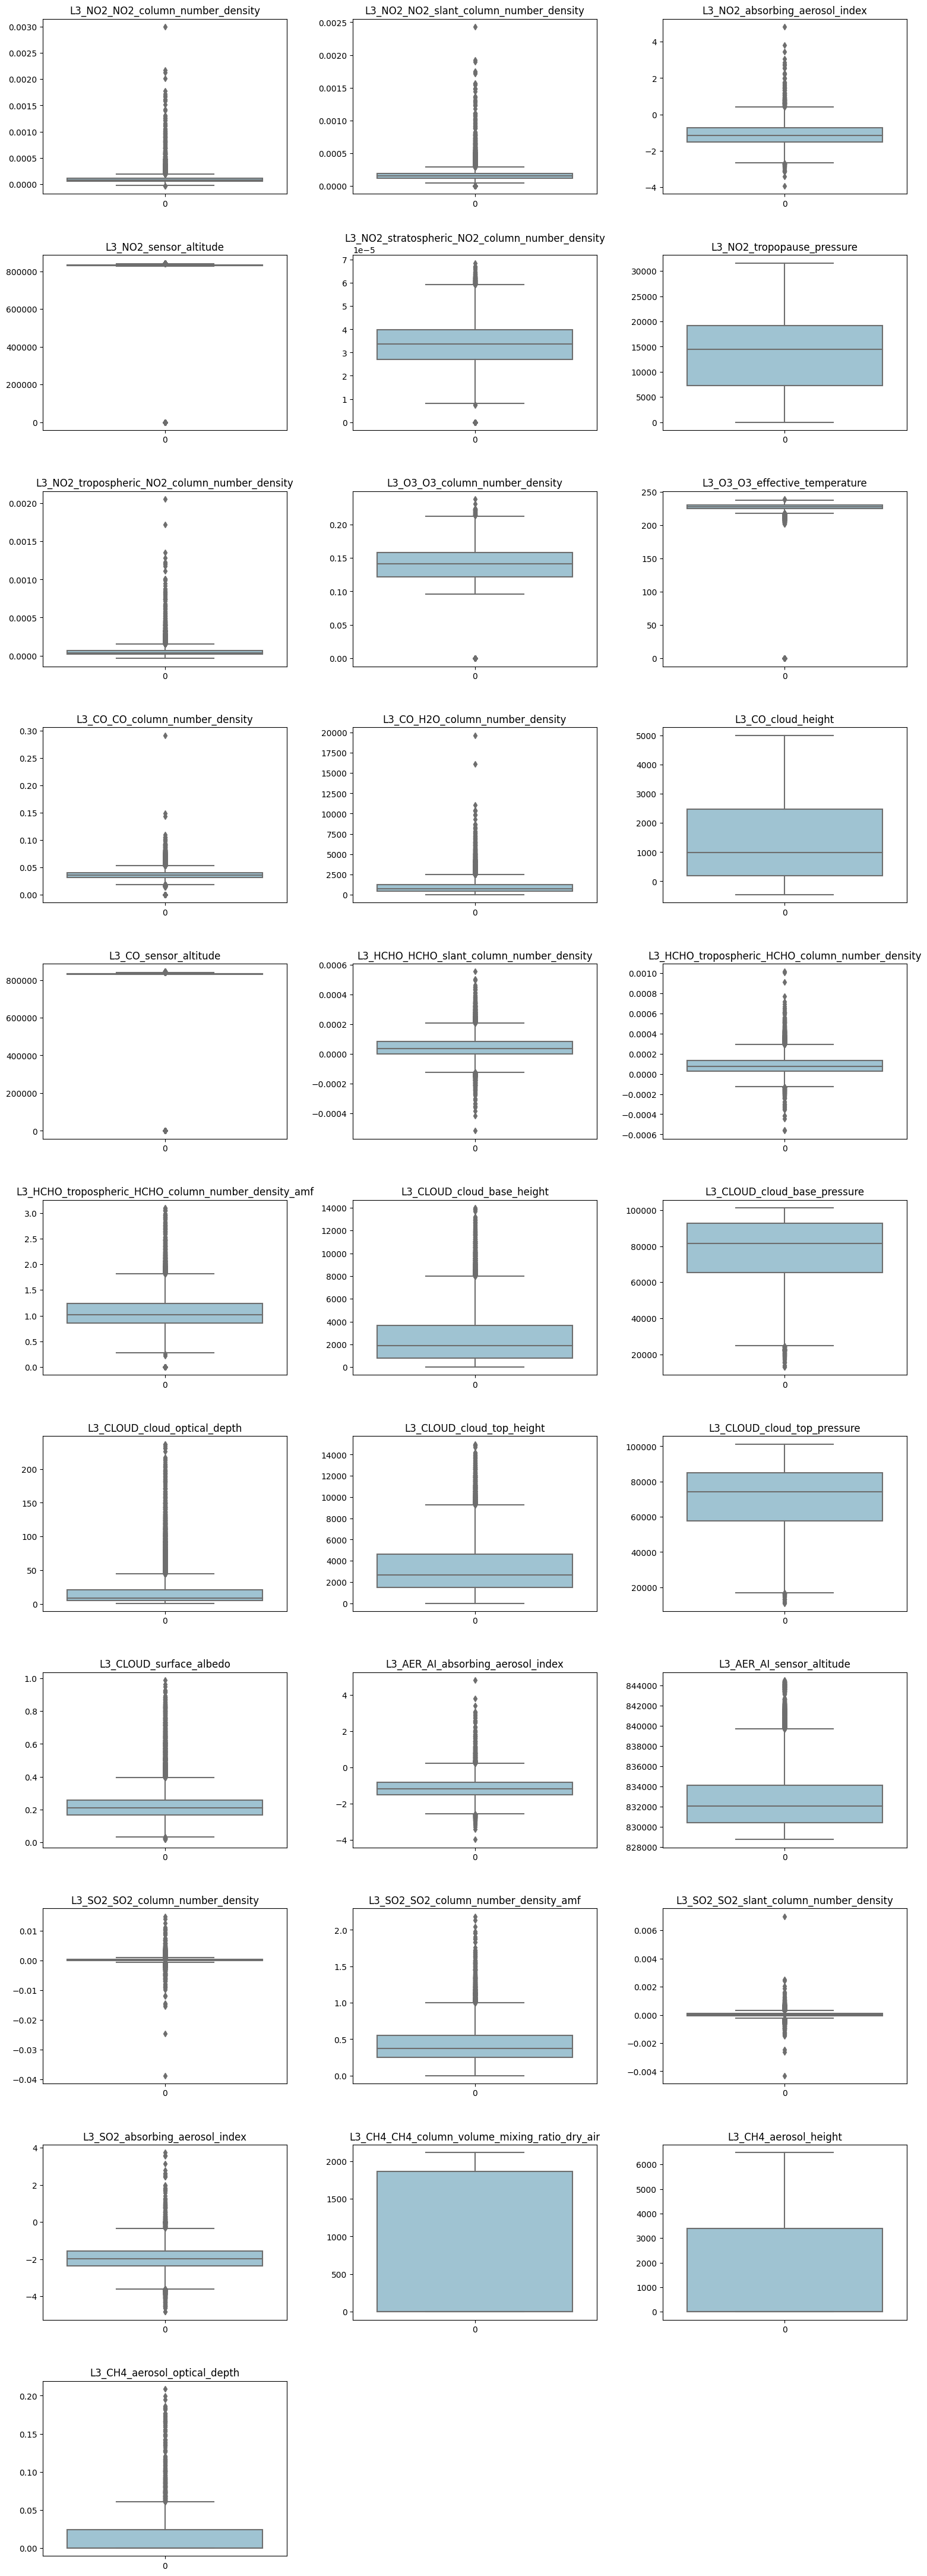

In [19]:
# Identify columns with missing values
columns_with_zeros = df_filtered_noangle_nocloud.columns[df_filtered_noangle_nocloud.isnull().any()]

# Filter the DataFrame to include only columns with missing values
data_missing = df_filtered_noangle_nocloud[columns_with_zeros]

# Assuming your DataFrame is named data_missing
num_columns = len(data_missing.columns)  # Get the number of columns in the DataFrame
cols_per_row = 3  # Number of plots per row (you can adjust this number as needed)

# Calculate the number of rows needed
num_rows = (num_columns + cols_per_row - 1) // cols_per_row  # Rounds up if not a perfect multiple

# Create a figure with the calculated number of subplots
fig, ax = plt.subplots(num_rows, cols_per_row, figsize=(16, 4 * num_rows))  # Adjusted height per row

count = 0
for item in data_missing.columns:
    sns.boxplot(data_missing[item], ax=ax[count // cols_per_row][count % cols_per_row], color='#96c6da').set(title=item, xlabel='')
    count += 1

# Hide empty subplots if they exist
if count < num_rows * cols_per_row:
    for i in range(count, num_rows * cols_per_row):
        ax.flat[i].set_visible(False)

fig.tight_layout(pad=3)
plt.show()

Next, we will look at the descriptive statistics of our data:

### target-values distribution


<Axes: xlabel='target', ylabel='Count'>

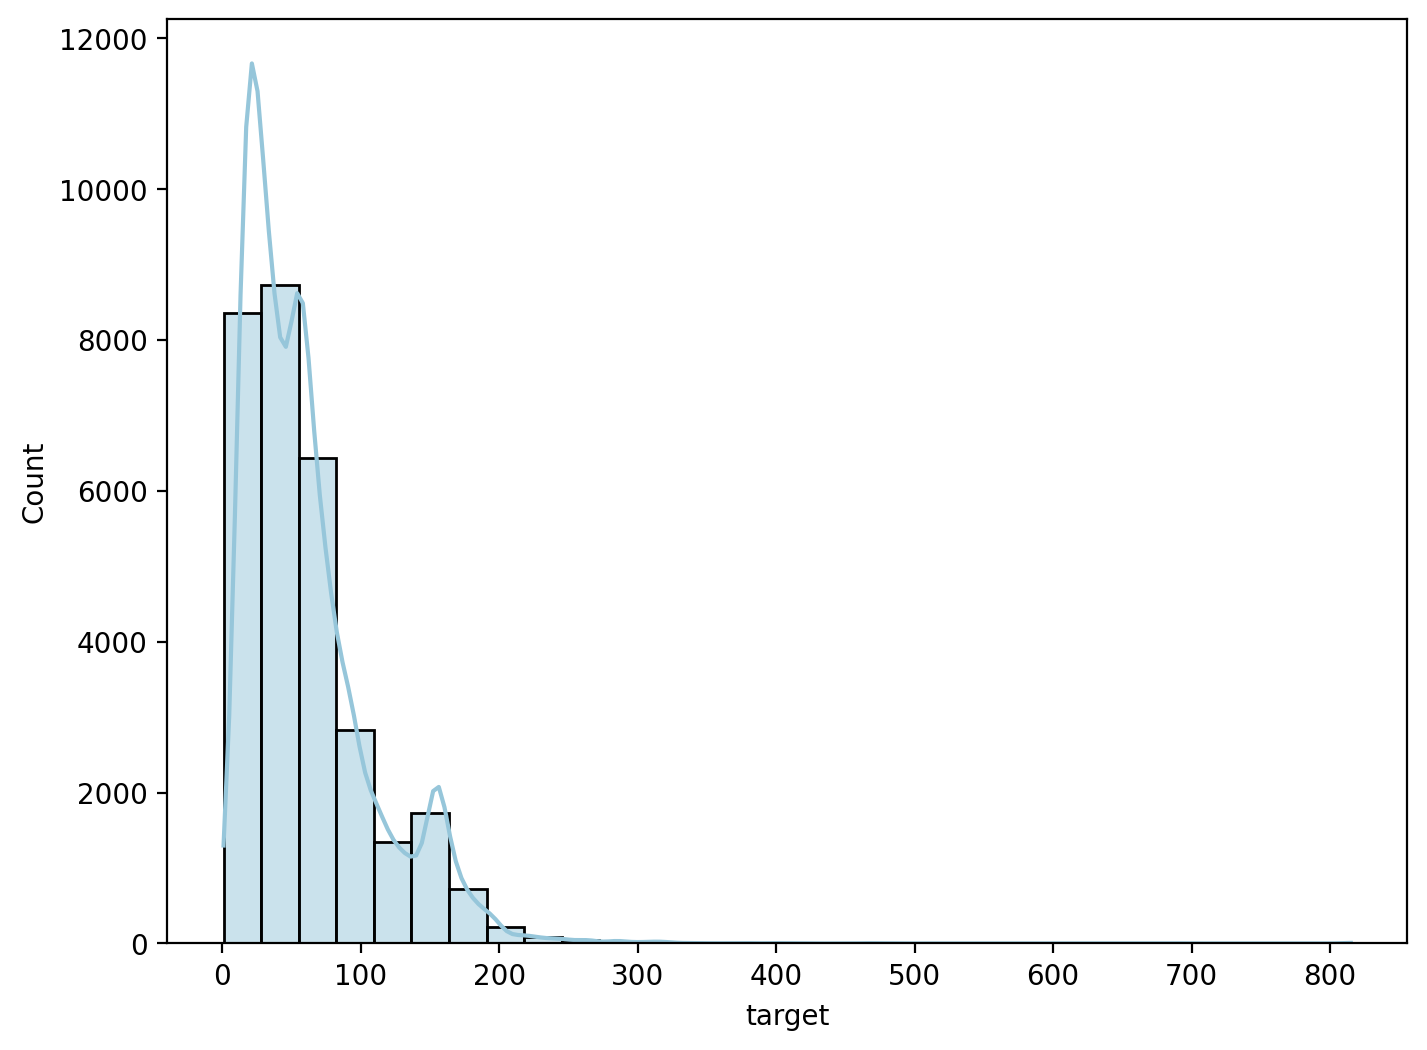

In [20]:
fig, ax = plt.subplots(figsize=(8,6),dpi=200)
sns.histplot(data=df_train, x="target",bins=30,kde=True,ax=ax, color='#96c6da')

<Axes: xlabel='target', ylabel='Count'>

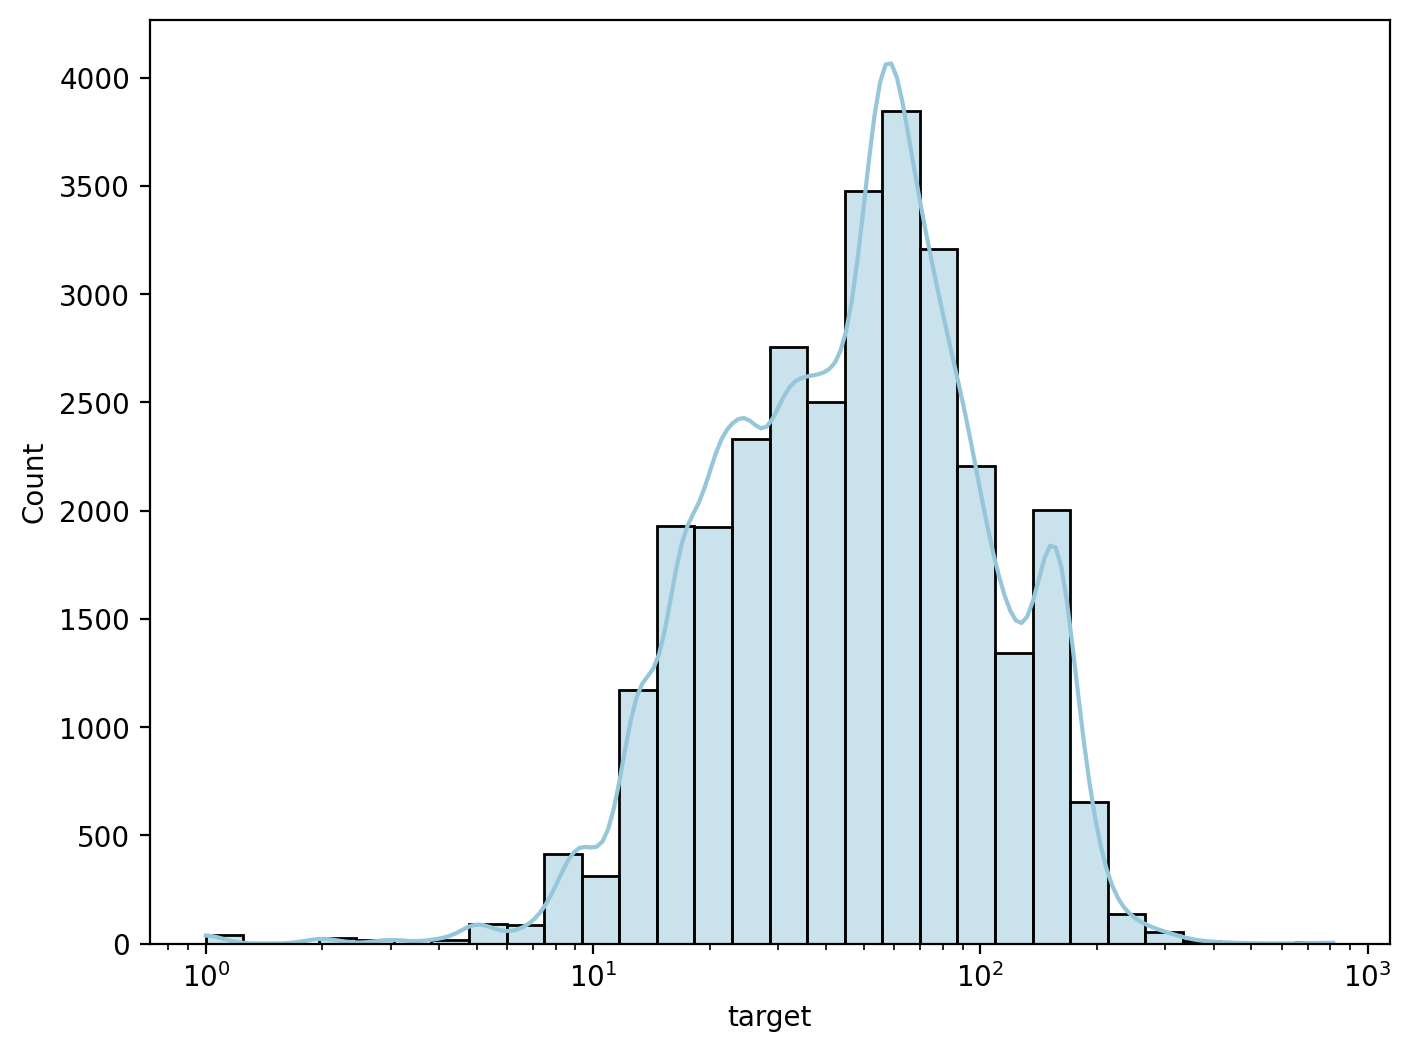

In [21]:
fig, ax = plt.subplots(figsize=(8,6),dpi=200)
sns.histplot(data=df_train, x="target",log_scale=True,bins=30,kde=True,ax=ax, color='#96c6da')

### Descriptive Statistics

In [22]:
# Examining the descriptive statistics of the dataset
X_test.describe()

target_min   target_max  target_variance  target_count   
count  9168.000000  9168.000000     9.168000e+03   9168.000000  \
mean     29.267681   118.986736     8.175057e+03    126.351985   
std      33.330426   100.275092     5.277319e+04    144.023642   
min       1.000000     1.000000     0.000000e+00      2.000000   
25%       5.000000    61.000000     1.076205e+03     46.000000   
50%      15.000000    92.000000     2.477350e+03     74.500000   
75%      45.000000   155.000000     5.926138e+03    153.000000   
max     274.000000   999.000000     1.841490e+06   1520.000000   

       precipitable_water_entire_atmosphere   
count                           9168.000000  \
mean                              15.417671   
std                               10.780060   
min                                0.675000   
25%                                7.700000   
50%                               12.300000   
75%                               20.300001   
max                               67.496147   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
count                        9168.000000                        9168.000000  \
mean                           70.587557                           0.006023   
std                            18.797174                           0.003786   
min                             5.914286                           0.000300   
25%                            58.618750                           0.003417   
50%                            74.200005                           0.004921   
75%                            85.500000                           0.007593   
max                           100.000000                           0.021279   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground   
count                  9168.000000                           9168.000000  \
mean                      9.382425                              0.389157   
std                       9.361771                              2.675119   
min                     -28.140352                            -13.088169   
25%                       3.156525                             -1.096948   
50%                       8.588815                              0.218037   
75%                      16.227846                              1.733864   
max                      37.437921                             17.955124   

       v_component_of_wind_10m_above_ground  ...  L3_SO2_sensor_zenith_angle   
count                           9168.000000  ...                 6936.000000  \
mean                               0.052239  ...                   35.521075   
std                                2.626223  ...                   18.996576   
min                              -15.023647  ...                    0.000000   
25%                               -1.462356  ...                   19.336570   
50%                               -0.003710  ...                   38.123036   
75%                                1.502900  ...                   52.355003   
max                               12.667196  ...                   66.096756   

       L3_SO2_solar_azimuth_angle  L3_SO2_solar_zenith_angle   
count                 6936.000000                6936.000000  \
mean                  -125.063766                  46.149716   
std                     69.403806                  14.729990   
min                   -179.880630                   0.000000   
25%                   -166.068897                  36.295993   
50%                   -156.764316                  47.106695   
75%                   -121.006188                  57.087561   
max                    179.750478                  79.631711   

       L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height   
count                                    1815.000000            1815.000000  \
mean                                      926.855458            1713.618354   
std                                       929.916492     

Now, we take a look at feature-correlations:

### Correlation Matrix

<Axes: >

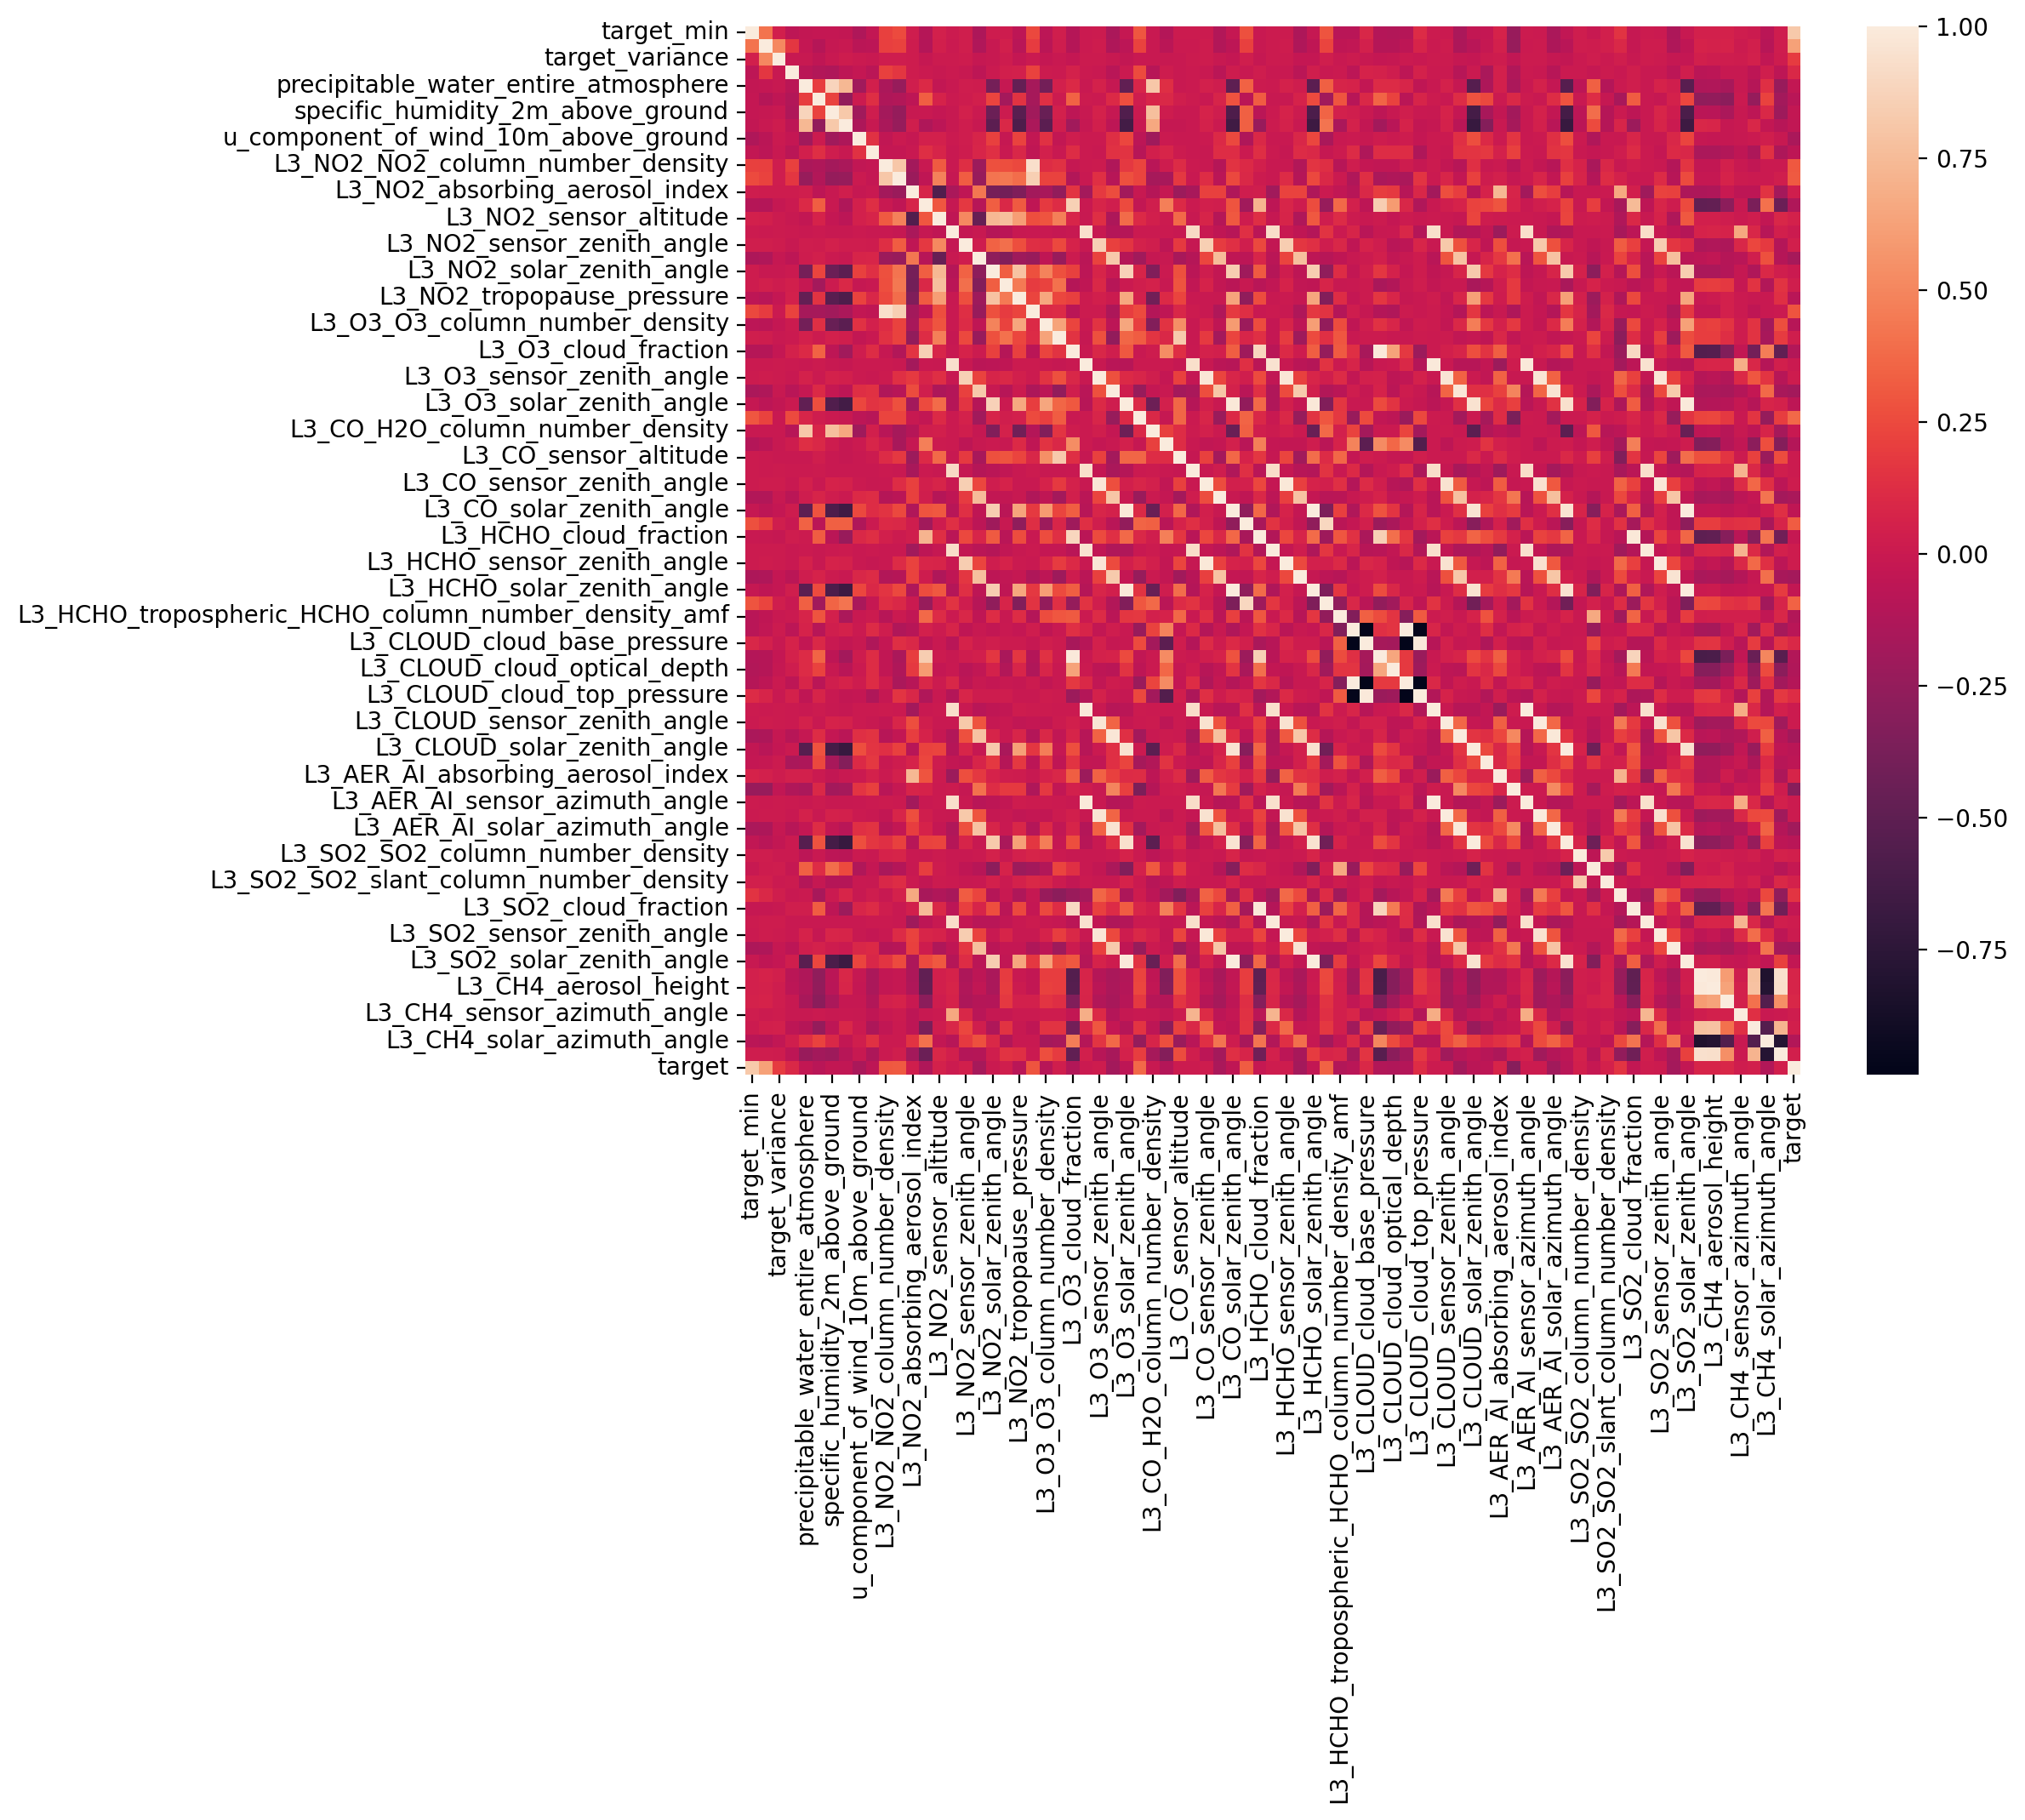

In [23]:
# #remove columns with non-numerical values
df_train_num = X_train.drop(['Date', 'Place_ID', 'Place_ID X Date'], axis=1).join(y)

# correlation plot
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.heatmap(df_train_num.corr(), annot=False,ax=ax)

The density of the data points makes it difficult to derive useful information. As a result, we will refine the correlation matrix to highlight only high correlation values. Given that the satellite angles are inherently correlated, we will remove them from the matrix before replottng the heatmap:

In [24]:
# Create a new DataFrame without columns containing the word 'angle'
df_filtered_noangle = df_train_num[[col for col in df_train_num.columns if 'angle' not in col]]

print(df_filtered_noangle)

       target_min  target_max  target_variance  target_count   
15534        11.0       162.0         10399.10           163  \
15205         5.0       129.0          6122.12           142   
9537         21.0        50.0           992.04           192   
30134         8.0        58.0          2800.25            72   
21061        30.0        85.0          1949.34            48   
...           ...         ...              ...           ...   
5699          1.0        57.0          2002.48           101   
10742        42.0        99.0          2088.70            24   
16921        21.0        74.0          1563.77            47   
25796        82.0       190.0         10329.10            24   
28847        74.0       172.0          5803.24           154   

       precipitable_water_entire_atmosphere   
15534                             16.900000  \
15205                              0.862500   
9537                               3.650000   
30134                             14.535974

<Axes: >

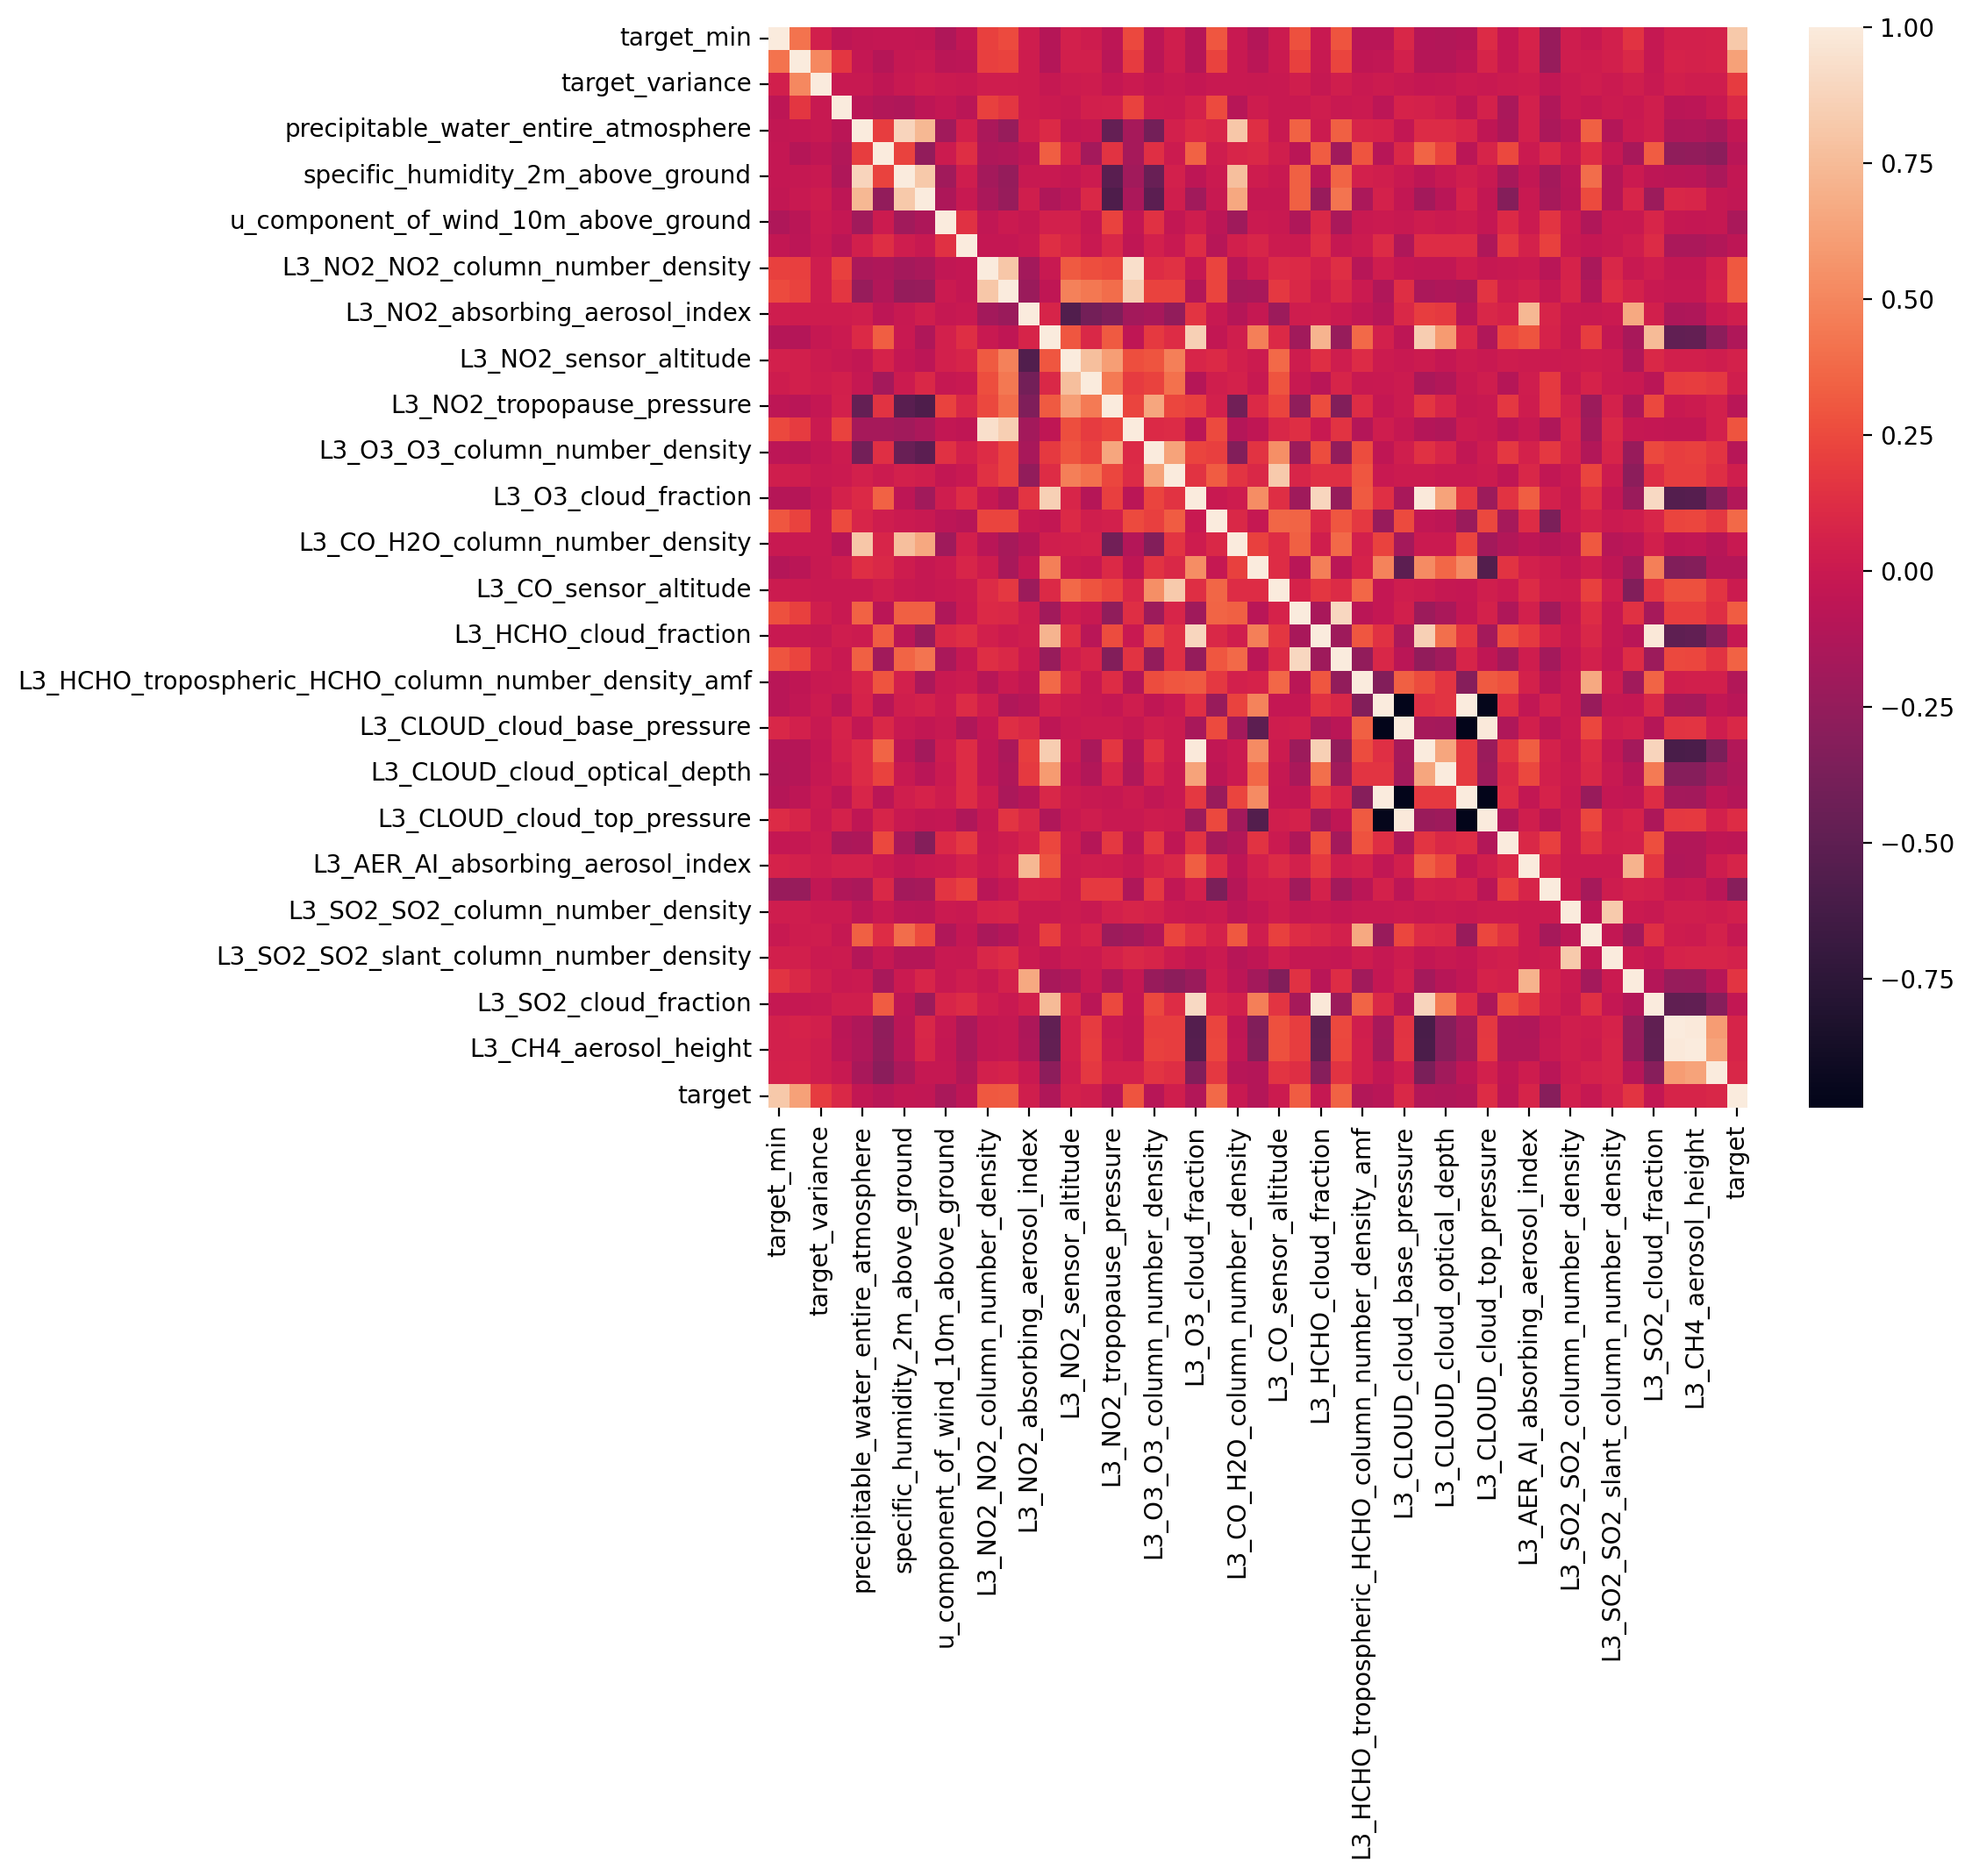

In [25]:
from matplotlib.colors import SymLogNorm

fig, ax = plt.subplots(figsize=(9,8),dpi=200)

sns.heatmap(df_filtered_noangle.corr(), ax=ax,annot=False)

# sns.heatmap(df_filtered_noangle.corr(), ax=ax,annot=False,
#             norm=SymLogNorm(linthresh=0.01, linscale=1, 
#                             vmin=-1, vmax=1, base=10),
#             cmap='coolwarm')


Now, we will filter for high correlation values. To achieve this, we first need to create a DataFrame containing the correlation matrix.

In [26]:
# Create the correlation matrix
corr_matrix = df_filtered_noangle.corr()

# Find correlations of other columns with 'target' where the absolute value of correlation is greater than 0.9
high_corr_with_target = corr_matrix['target'].abs().where(lambda x: abs(x) > 0.2).dropna()

print(high_corr_with_target)

target_min                                         0.821022
target_max                                         0.622676
L3_NO2_NO2_column_number_density                   0.302755
L3_NO2_NO2_slant_column_number_density             0.314200
L3_NO2_tropospheric_NO2_column_number_density      0.291523
L3_CO_CO_column_number_density                     0.377015
L3_HCHO_HCHO_slant_column_number_density           0.318350
L3_HCHO_tropospheric_HCHO_column_number_density    0.344558
L3_AER_AI_sensor_altitude                          0.307862
target                                             1.000000
Name: target, dtype: float64


The columns 'target_min', 'target_max', and 'target' will be excluded when training the models later. Despite this, some significant correlations remain evident.

## Preprocess the Data

In [27]:
X_train, y_train = preprocessing_df(X_train, y_train)

New dataframe shape: (17766, 46) (17766,)


In [28]:
X_test, y_test = preprocessing_df(X_test, y_test)

New dataframe shape: (7595, 46) (7595,)


In [29]:
# Filtering rows where 'target' > 250
mask = y_train <= 250

X_train = X_train[mask]
y_train = y_train[mask]

In [30]:
X_train.head()

date place_id  precipitable_water_entire_atmosphere   
0     0  D41QK7I                              6.600000  \
1     0  F9780KK                             19.800001   
2     0  NW6MZ2E                              7.000000   
3     0  THZR2TS                             26.700001   
4     0  UB4SRN5                             32.799999   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
0                          72.500000                            0.00268  \
1                          88.599998                            0.00924   
2                          61.000000                            0.00377   
3                          78.300003                            0.01112   
4                          82.599998                            0.01244   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground   
0                    -0.193182                              1.576377  \
1                    14.776819                             -3.723623   
2                     7.076837                             -0.083623   
3                    19.826837                             -0.743623   
4                    20.056818                             -0.263623   

   v_component_of_wind_10m_above_ground  l3_no2_no2_column_number_density   
0                             -2.647395                          0.000114  \
1                             -2.337395                          0.000081   
2                             -1.067395                          0.000069   
3                             -1.777395                          0.000128   
4                             -1.017395                          0.000049   

   l3_no2_no2_slant_column_number_density  ...   
0                                0.000246  ...  \
1                                0.000159  ...   
2                                0.000176  ...   
3                                0.000171  ...   
4                                0.000098  ...   

   l3_so2_so2_column_number_density  l3_so2_so2_column_number_density_amf   
0                          0.000112                              0.372497  \
1                         -0.000217                              0.327881   
2                          0.000247                              0.263712   
3                         -0.000048                              0.197794   
4                          0.000048                              0.606845   

   l3_so2_so2_slant_column_number_density  l3_so2_absorbing_aerosol_index   
0                                0.000036                       -1.759583  \
1                               -0.000076                       -2.717048   
2                                0.000070                       -1.486788   
3                               -0.000023                       -2.243393   
4                                0.000024                       -2.627897   

   l3_so2_cloud_fraction  month  day  day_of_week  mean_sensor_zenit_angle   
0               0.233439      1    2            3                47.009244  \
1               0.214205      1    2            3                 1.718073   
2               0.267762      1    2            3                60.999037   
3               0.383467      1    2            3                47.853011   
4               0.264350      1    2            3                 3.041126   

   mean_solar_zenit_angle  
0               62.350734  
1               49.216998  
2               59.652914  
3               47.708049  
4               45.349251  

[5 rows x 46 columns]

## Preprocessing Pipeline

### Categorical vs numerical variables

In [31]:
# # Creating list for categorical predictors/features 
cat_features = ['place_id']
cat_features

['place_id']

In [32]:
# # Creating list for numerical predictors/features 
num_features = X_train.columns.tolist()
num_features.remove('place_id')
num_features

['date',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'l3_no2_no2_column_number_density',
 'l3_no2_no2_slant_column_number_density',
 'l3_no2_absorbing_aerosol_index',
 'l3_no2_cloud_fraction',
 'l3_no2_sensor_altitude',
 'l3_no2_stratospheric_no2_column_number_density',
 'l3_no2_tropopause_pressure',
 'l3_no2_tropospheric_no2_column_number_density',
 'l3_o3_o3_column_number_density',
 'l3_o3_o3_effective_temperature',
 'l3_o3_cloud_fraction',
 'l3_co_co_column_number_density',
 'l3_co_h2o_column_number_density',
 'l3_co_cloud_height',
 'l3_co_sensor_altitude',
 'l3_hcho_hcho_slant_column_number_density',
 'l3_hcho_cloud_fraction',
 'l3_hcho_tropospheric_hcho_column_number_density',
 'l3_hcho_tropospheric_hcho_column_number_density_amf',
 'l3_cloud_cloud_base_height',
 'l3_cloud_cloud_base_pressure',
 

In [33]:
#from sklearn.pipeline import Pipeline

# Pipline for numerical features
# Initiating Pipeline and calling one step after another
# each step is built as a list of (key, value)
# key is the name of the processing step
# value is an estimator object (processing step)

num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Pipeline for categorical features 
cat_pipeline = Pipeline([
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])

In [34]:
# 'ColumnTransformer' applies the transformers (num_pipeline/ cat_pipeline)
# to specific columns of an array or DataFrame (num_features/cat_features)
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

## Predictive Modelling using Pipelines and Grid Search

### Linear Regression Model - Basis Model
Now that we have a preprocessing pipeline, we can add a basis model on top (this sequence will also be handled by a Pipeline) and see how it performs using cross validation. 

Model: Linear Regression
Root Mean Squared Error: 22.99
R^2 Score: 0.72
Adj. R^2 Score: 0.72


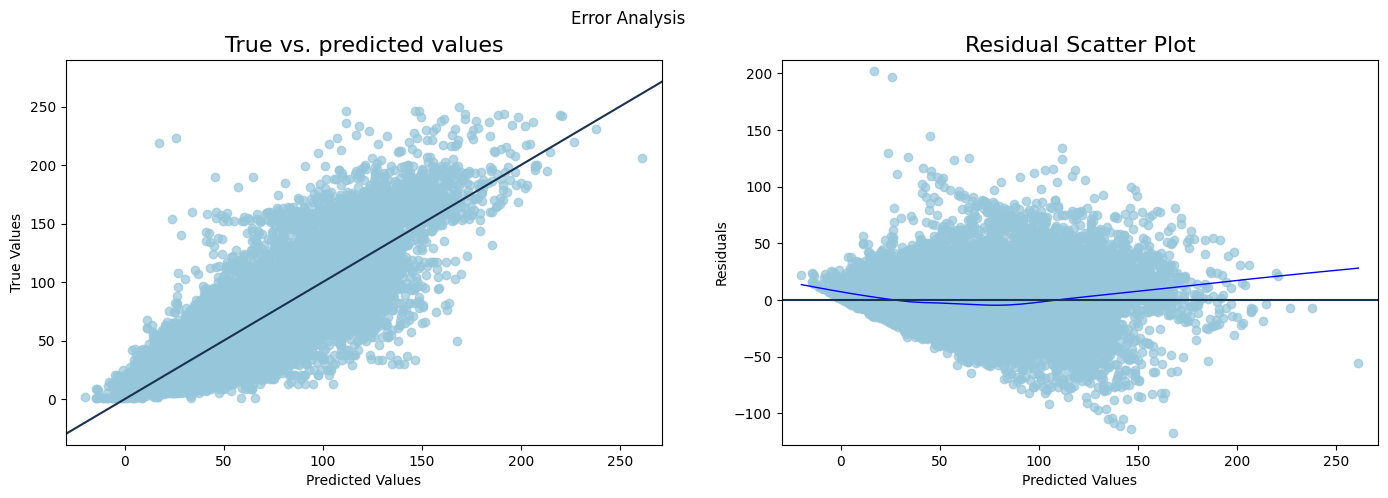

In [35]:
# Building a full pipeline with our preprocessor and a Linear Regression model
pipe_linreg = Pipeline([
    ('preprocessor', preprocessor),
    ('linreg', LinearRegression())
])

# Final model evaluation using the test set
pipe_linreg.fit(X_train, y_train)  # Train the model on the entire training set
y_test_pred = pipe_linreg.predict(X_test)  # Predict the test set
y_train_pred = pipe_linreg.predict(X_train)  # Predict the train set

# print_scores(X_train, y_train, y_train_pred)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Update and print the scores, and update the DataFrame
df_models_rmse = print_save_scores('Linear Regression', pipe_linreg, X_train, y_train, y_train_pred, df_models_rmse)

plt.savefig('../images/linear_regression.png', transparent=True, bbox_inches='tight')


### Scoring function

We created a custom scoring function to evaluate the performance of the different grid searches

In [36]:
rmse_scoring = make_scorer(rmse_scorer, greater_is_better=False)

### Ridge Regression Model

**GridSearchCV**

Best score:
-24.80
Best parameters:
{'ridge__alpha': 1}
Root Mean Squared Error: 25.94
R^2 Score: 0.69
Adj. R^2 Score: 0.69


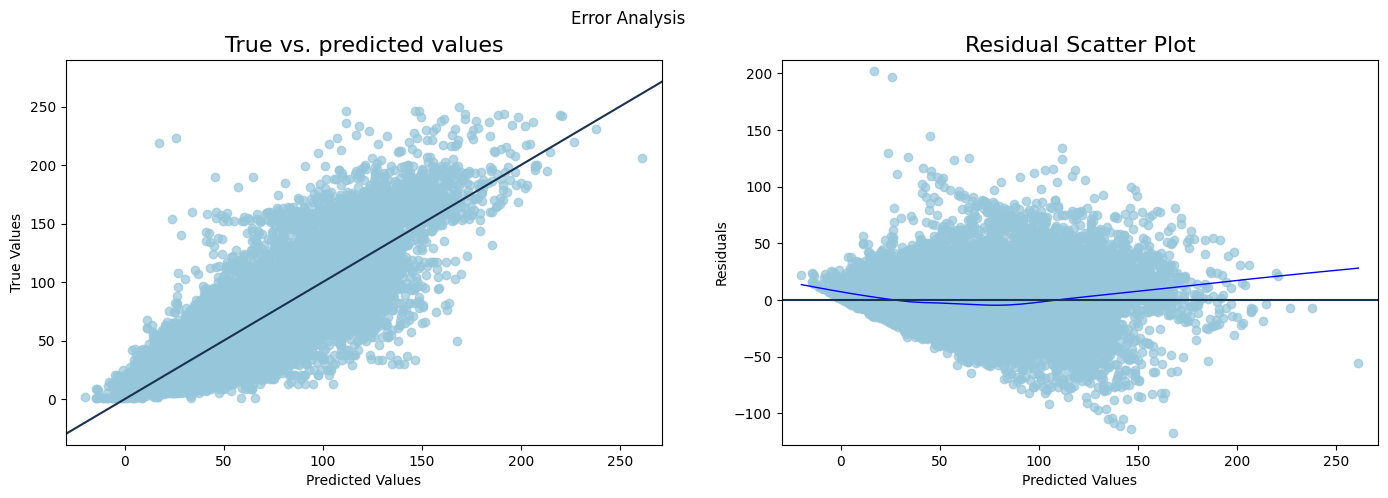

In [37]:
# Defining parameter space for grid-search
param_ridge = {
    'ridge__alpha': [None, 0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

pipe_model = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
    ])
    
best_model_ridge, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_model,param_ridge,
                                search_type='grid',reg_name='ridge',scoring_func = rmse_scoring)


error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Ridge Regression GSCV', y_test, y_test_pred, df_models_rmse)


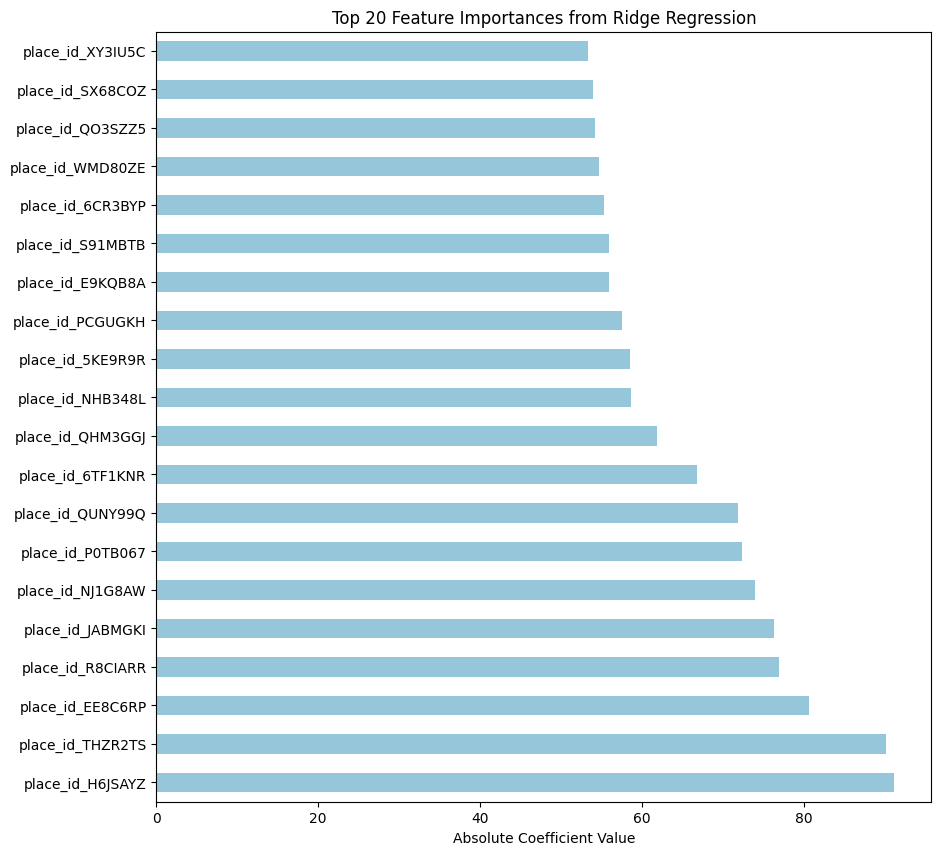

In [38]:
plot_most_important_features(best_model_ridge,'ridge',20)


**RandomizedSearchCV**

Best score:
-24.80
Best parameters:
{'ridge__alpha': 1}
Root Mean Squared Error: 25.94
R^2 Score: 0.69
Adj. R^2 Score: 0.69


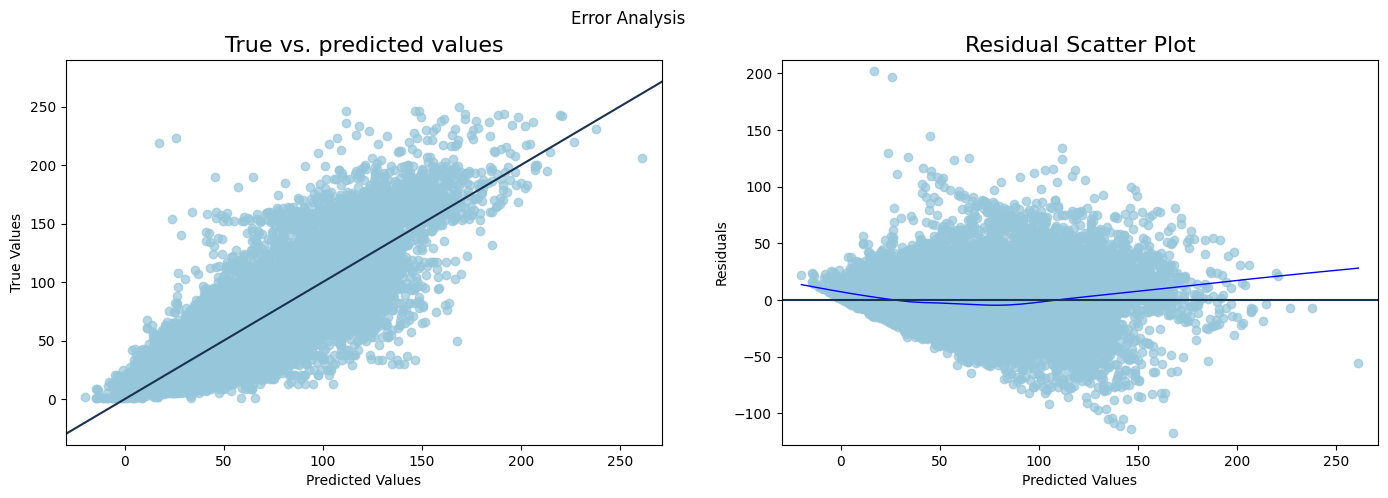

In [39]:
# Defining parameter space for grid-search
param_ridge = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

pipe_model = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
    ])
    
best_model_ridge, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_model,param_ridge,
                                search_type='random',reg_name='ridge',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Ridge Regression RSCV', y_test, y_test_pred, df_models_rmse)

### Lasso Regression Model

**GridSearchCV**

Best score:
-24.80
Best parameters:
{'lasso__alpha': 0.001, 'lasso__max_iter': 10000}
Root Mean Squared Error: 25.92
R^2 Score: 0.69
Adj. R^2 Score: 0.69


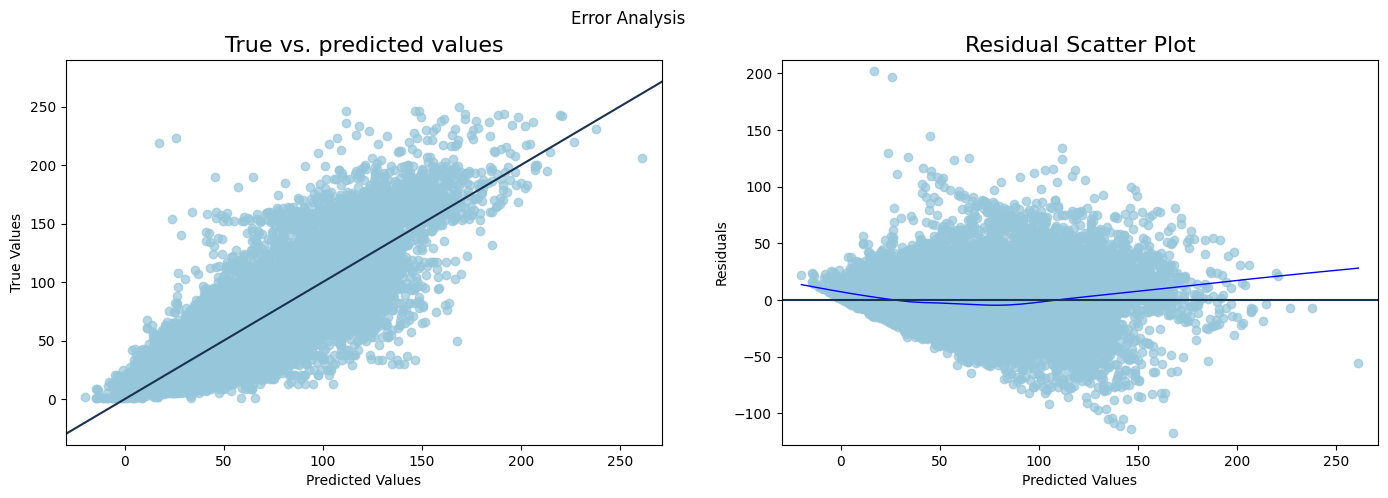

In [40]:
# Building a full pipeline with our preprocessor and a Lasso Regression model -- approx. 3.30 min running time

# Defining parameter space for grid-search
param_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'lasso__max_iter': [1000, 5000, 10000],  # Number of iterations -> could change it to 5000, 10000, 100000 because of warnings too less iterations
    # 'lasso__tol': [0.01, 0.001, 0.0001]  # Tolerance for stopping criteria
}

pipe_model = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
    ])
    
best_model_lasso, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_model,param_lasso,
                                search_type='grid',reg_name='lasso',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Lasso Regression GSCV', y_test, y_test_pred, df_models_rmse)

**RandomizedSearchCV**

Best score:
-24.80
Best parameters:
{'lasso__max_iter': 10000, 'lasso__alpha': 0.001}
Root Mean Squared Error: 25.92
R^2 Score: 0.69
Adj. R^2 Score: 0.69


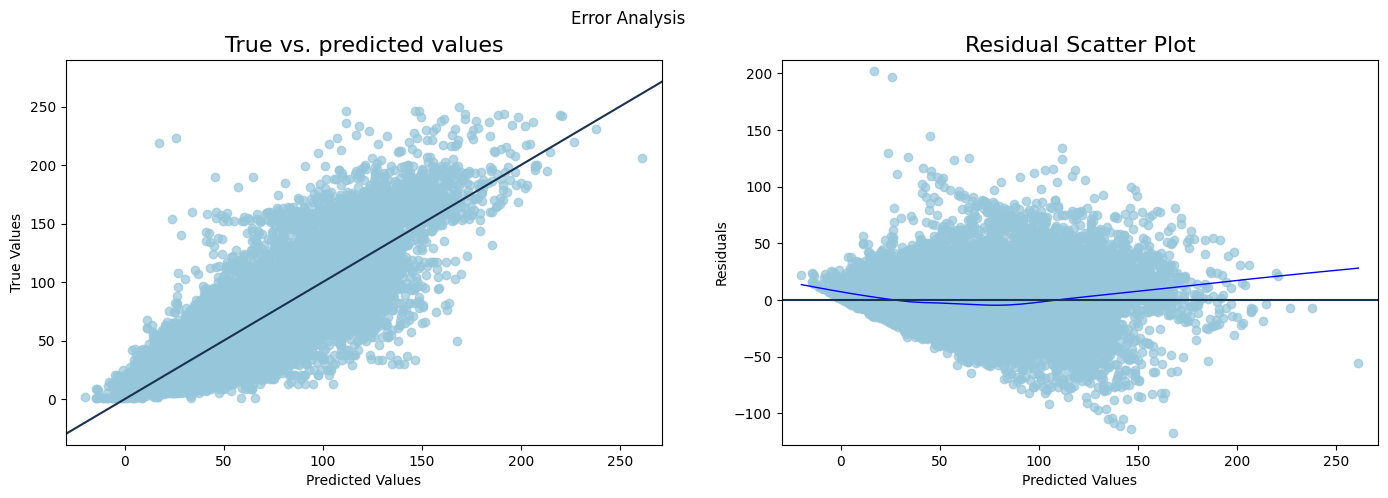

In [41]:
param_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'lasso__max_iter': [1000, 5000, 10000],  # Number of iterations -> could change it to 5000, 10000, 100000 because of warnings too less iterations
    # 'lasso__tol': [0.01, 0.001, 0.0001]  # Tolerance for stopping criteria
}

pipe_model = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
    ])
    
best_model_lasso_random, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_model,param_lasso,
                                search_type='random',reg_name='lasso',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Lasso Regression RSCV', y_test, y_test_pred, df_models_rmse)

### Elastic Net Regression Model

**GridSearchCV**

Best score:
-24.77
Best parameters:
{'elastic_net__alpha': 0.001, 'elastic_net__l1_ratio': 0.9}
Root Mean Squared Error: 26.00
R^2 Score: 0.69
Adj. R^2 Score: 0.69


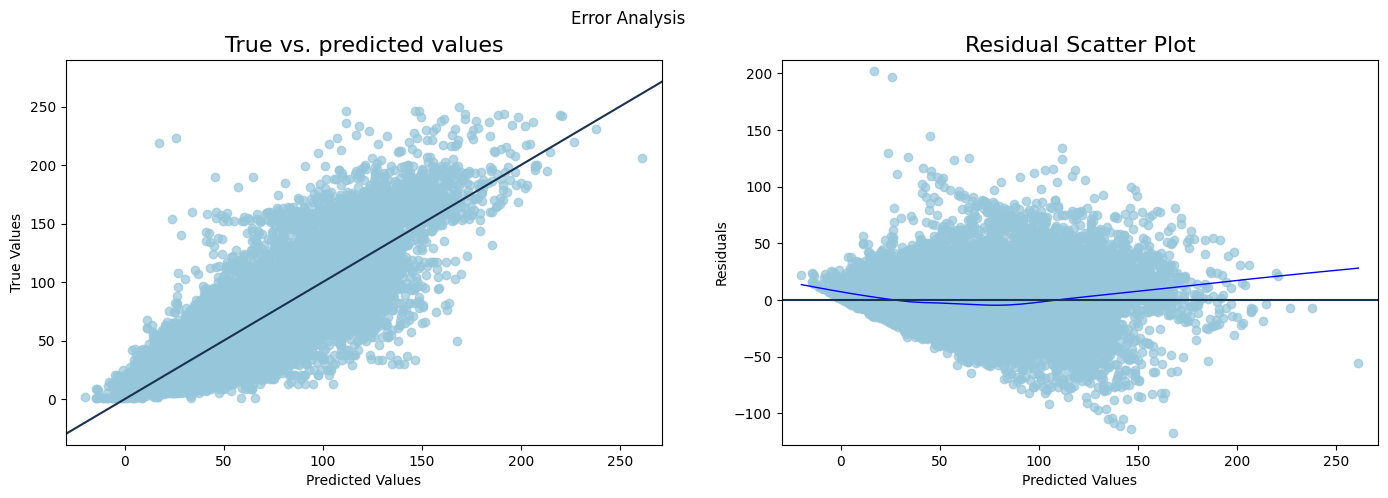

In [42]:
# Defining parameter space for grid-search
param_elastic = {
    'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'elastic_net__l1_ratio': [0.1, 0.5, 0.9]  # Blend of L1 and L2 regularization
}

pipe_model = Pipeline([
    ('preprocessor', preprocessor),
    ('elastic_net', ElasticNet())
    ])
    
best_model_elastic, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_model,param_elastic,
                                search_type='grid',reg_name='elastic_net',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Elastic Net GSCV', y_test, y_test_pred, df_models_rmse)

**RandomizedSearchCV**

Best score:
-24.95
Best parameters:
{'elastic_net__l1_ratio': 0.5, 'elastic_net__alpha': 0.001}
Root Mean Squared Error: 26.47
R^2 Score: 0.68
Adj. R^2 Score: 0.68


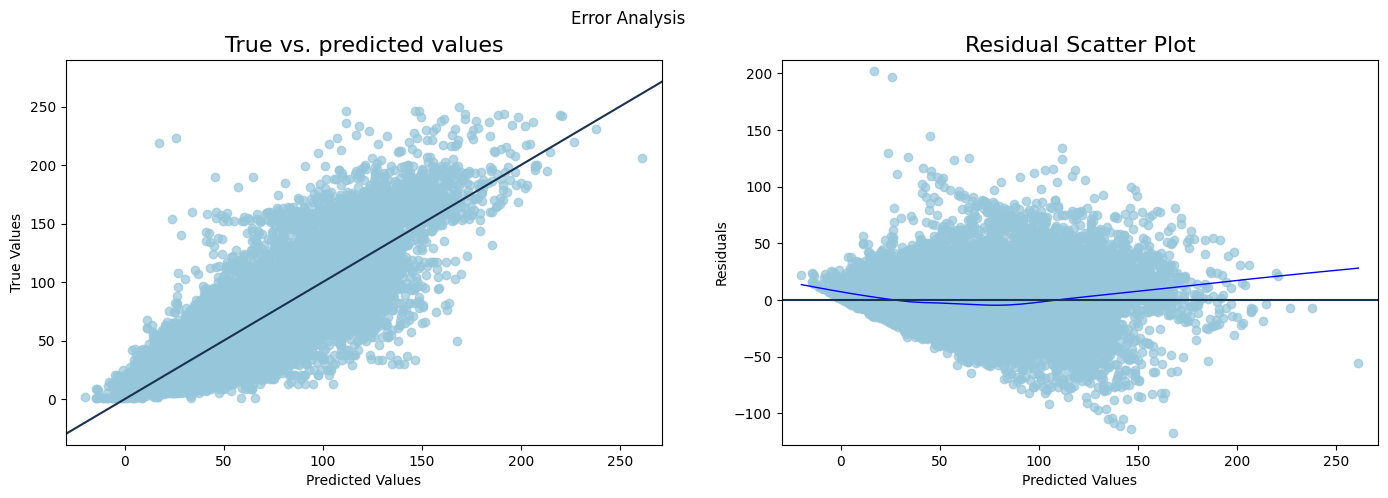

In [43]:
# Defining parameter space for grid-search
param_elastic = {
    'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'elastic_net__l1_ratio': [0.1, 0.5, 0.9]  # Blend of L1 and L2 regularization
}

pipe_model = Pipeline([
    ('preprocessor', preprocessor),
    ('elastic_net', ElasticNet())
    ])
    
best_model_elastic_random, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_model,param_elastic,
                                search_type='random',reg_name='elastic_net',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Elastic Net RSCV', y_test, y_test_pred, df_models_rmse)

### Descission Tree Regression Model

**GridSearchCV**

Best score:
-34.23
Best parameters:
{'dectree__ccp_alpha': 0.1, 'dectree__max_depth': 100, 'dectree__min_impurity_decrease': 0.0, 'dectree__min_samples_leaf': 2, 'dectree__min_samples_split': 10, 'dectree__splitter': 'random'}
Root Mean Squared Error: 33.19
R^2 Score: 0.50
Adj. R^2 Score: 0.49


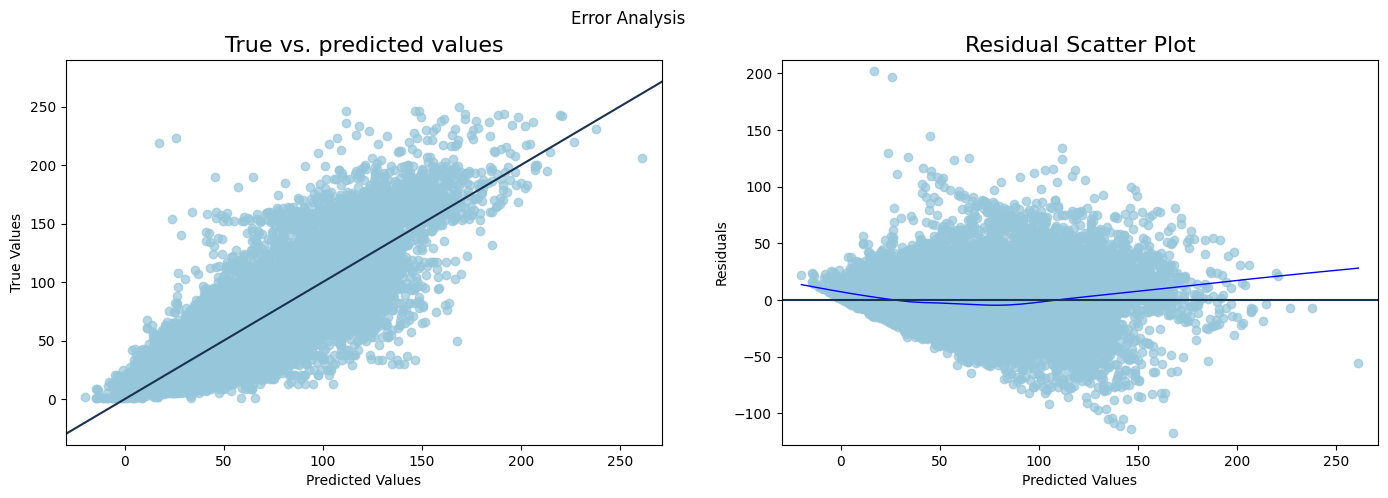

In [44]:
# Building a full pipeline with our preprocessor and a Decission Tree Regressor
pipe_dectree = Pipeline([
    ('preprocessor', preprocessor),
    ('dectree', DecisionTreeRegressor())
])

# Defining parameter space for grid-search. 
param_dectree = {'dectree__splitter': ['best', 'random'],
                'dectree__max_depth': [1, 10, 100],
                'dectree__min_samples_split': [2, 5, 10],
                'dectree__min_samples_leaf': [1, 2, 4],
                'dectree__min_impurity_decrease': [0.0, 0.01, 0.1],
                'dectree__ccp_alpha': [0.0, 0.01, 0.1]
               }


best_model_dectree, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_dectree,param_dectree,
                                search_type='grid',reg_name='dectree',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Decision Tree GSCV', y_test, y_test_pred, df_models_rmse)

**RandomizedSearchCV**

Best score:
-34.92
Best parameters:
{'dectree__splitter': 'random', 'dectree__min_samples_split': 5, 'dectree__min_samples_leaf': 1, 'dectree__min_impurity_decrease': 0.0, 'dectree__max_depth': 10, 'dectree__ccp_alpha': 0.0}
Root Mean Squared Error: 36.51
R^2 Score: 0.39
Adj. R^2 Score: 0.39


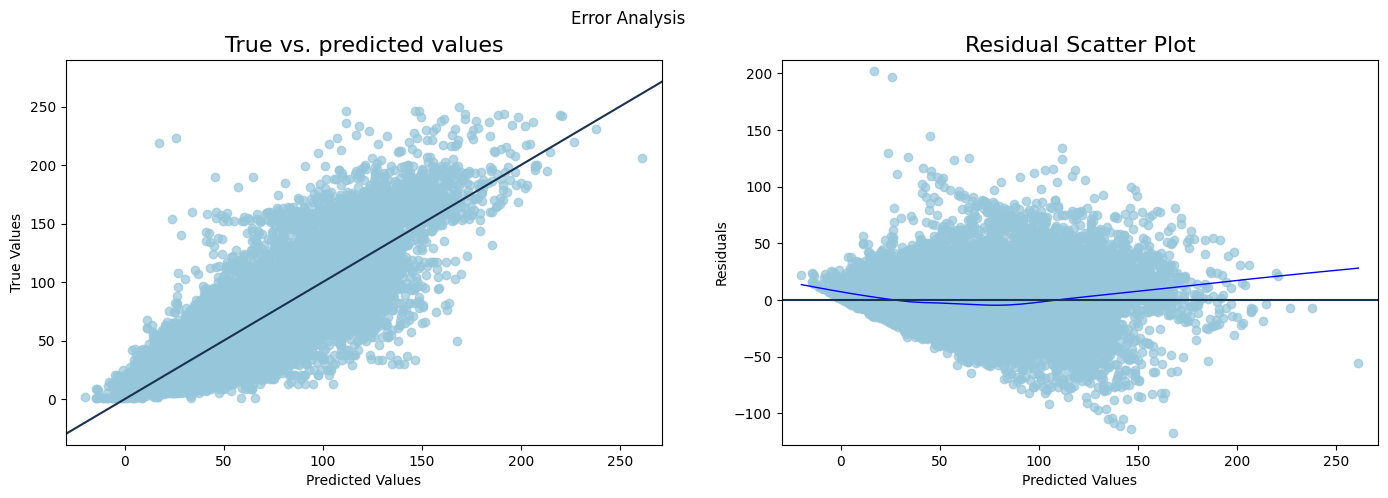

In [45]:
# Building a full pipeline with our preprocessor and a Decission Tree Regressor
pipe_dectree = Pipeline([
    ('preprocessor', preprocessor),
    ('dectree', DecisionTreeRegressor())
])

# Defining parameter space for randomized-search
param_dectree = {'dectree__splitter': ['best', 'random'],
                'dectree__max_depth': [1, 10, 100],
                'dectree__min_samples_split': [2, 5, 10],
                'dectree__min_samples_leaf': [1, 2, 4],
                'dectree__min_impurity_decrease': [0.0, 0.01, 0.1],
                'dectree__ccp_alpha': [0.0, 0.01, 0.1]
               }

best_model_dectree_random, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_dectree,param_dectree,
                                search_type='random',reg_name='dectree',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Elastic Net Regression RSCV', y_test, y_test_pred, df_models_rmse)

### Random  Forest Regression Model

**GridSearchCV**

Best score:
-28.31
Best parameters:
{'rf__max_features': 'auto'}
Root Mean Squared Error: 27.88
R^2 Score: 0.65
Adj. R^2 Score: 0.64


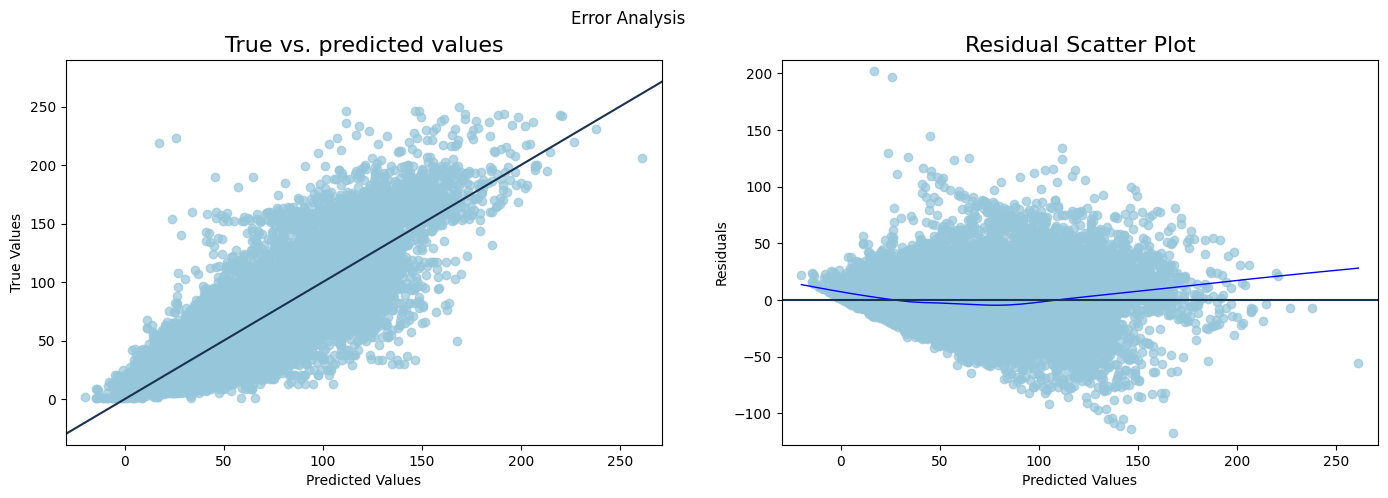

In [46]:
# Building a full pipeline with our preprocessor and a Random Forest Regressor
pipe_random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor())
])

# Defining parameter space for grid-search
param_random_forest = {
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

best_model_rf, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_random_forest,param_random_forest,
                                search_type='grid',reg_name='rf',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Random Forest GSCV', y_test, y_test_pred, df_models_rmse)

**RandomizedSearchCV**

Best score:
-28.34
Best parameters:
{'rf__max_features': 'auto'}
Root Mean Squared Error: 27.93
R^2 Score: 0.64
Adj. R^2 Score: 0.64


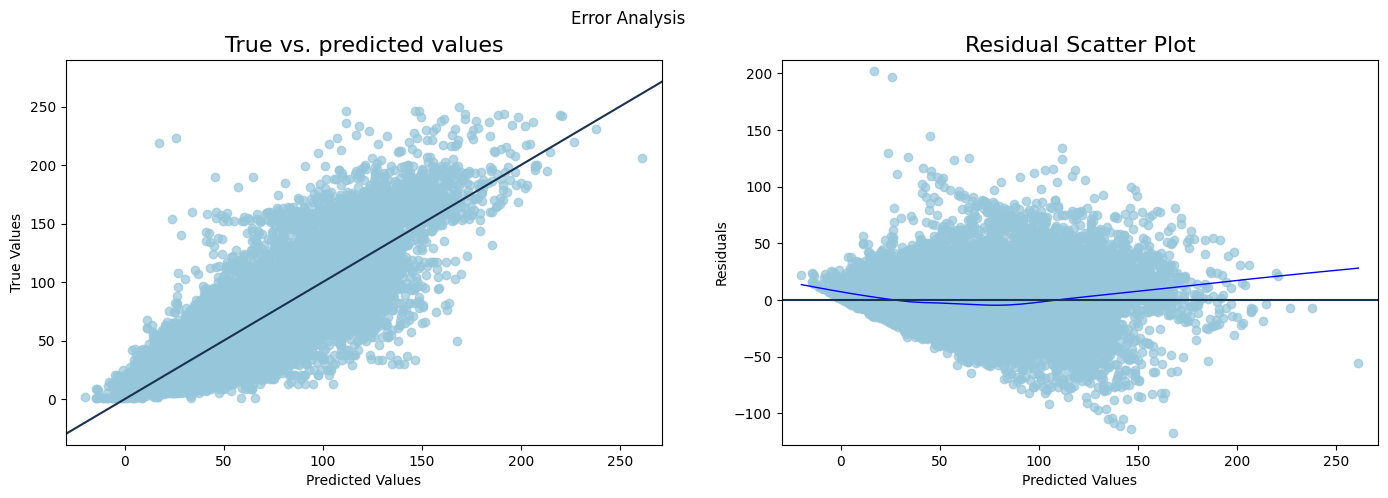

In [47]:
# Building a full pipeline with our preprocessor and a Random Forest Regressor
pipe_random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor())
])

# Defining parameter space for randomized-search
param_random_forest = {
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

best_model_rf_random, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_random_forest,param_random_forest,
                                search_type='random',reg_name='rf',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('Random Forest RSCV', y_test, y_test_pred, df_models_rmse)

### AdaBoost Regression Model

**GridSearchCV**

Best score:
-36.59
Best parameters:
{'adaboost__base_estimator__max_depth': 3, 'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 300}
Root Mean Squared Error: 38.85
R^2 Score: 0.31
Adj. R^2 Score: 0.31


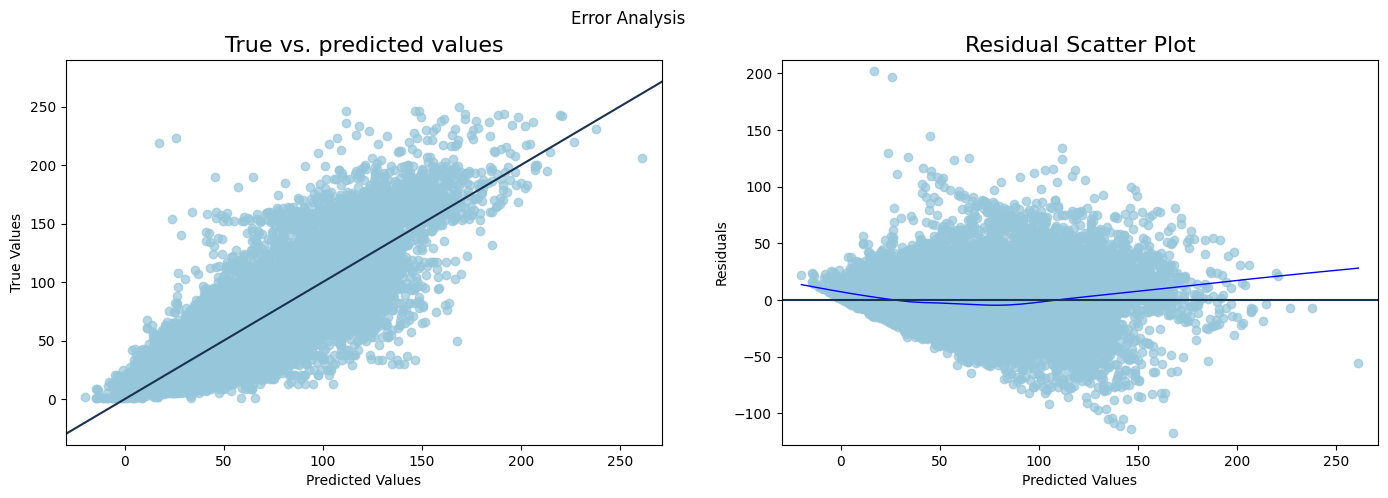

In [48]:
# Defining parameter space for randomized-search
param_adaboost = {
    'adaboost__n_estimators': [50, 100, 300],
    'adaboost__learning_rate': [0.01, 0.1, 1.0],
    'adaboost__base_estimator__max_depth': [1, 2, 3]  # Depths for the decision trees
}

pipe_adaboost = Pipeline([
    ('preprocessor', preprocessor),
    ('adaboost', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42))
])

best_model_ada, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,
                                pipe_adaboost,param_adaboost,
                                search_type='grid',reg_name='adaboost',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da') ####auf y_test und y_test_pred

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('AdaBoost GSCV', y_test, y_test_pred, df_models_rmse)

**RandomizedSearchCV**

Best score:
-37.22
Best parameters:
{'adaboost__n_estimators': 100, 'adaboost__learning_rate': 0.1, 'adaboost__base_estimator__max_depth': 3}
Root Mean Squared Error: 39.22
R^2 Score: 0.30
Adj. R^2 Score: 0.29


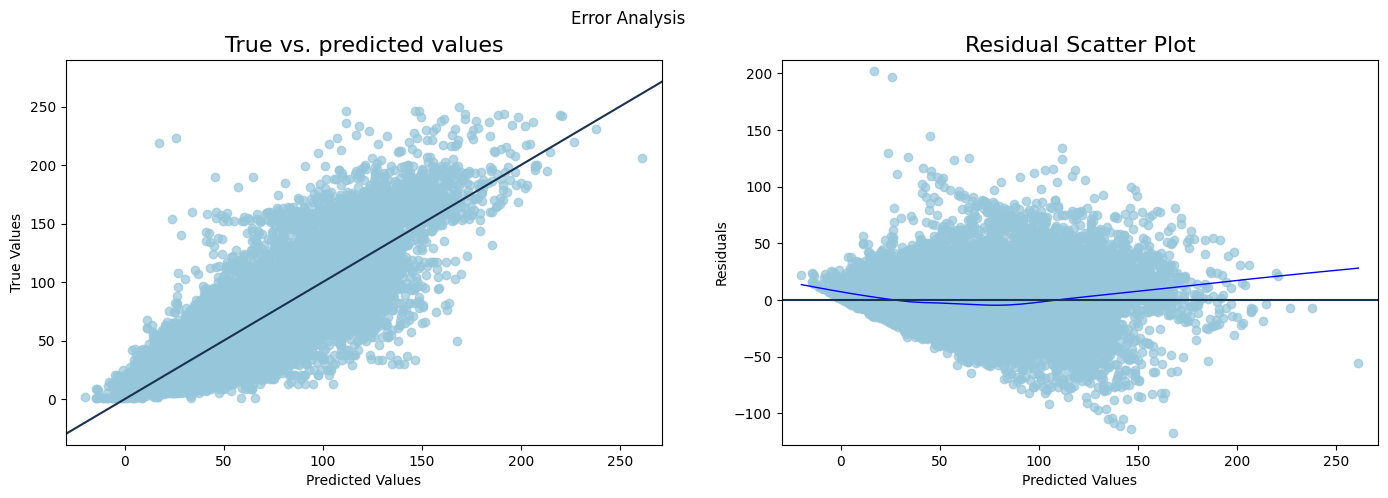

In [49]:
# Defining parameter space for randomized-search
param_adaboost = {
    'adaboost__n_estimators': [50, 100, 300],
    'adaboost__learning_rate': [0.01, 0.1, 1.0],
    'adaboost__base_estimator__max_depth': [1, 2, 3]  # Depths for the decision trees
}

pipe_adaboost = Pipeline([
    ('preprocessor', preprocessor),
    ('adaboost', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42))
])

best_model_ada_random, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,
                                pipe_adaboost,param_adaboost,
                                search_type='random',reg_name='adaboost',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('AdaBoost RSCV', y_test, y_test_pred, df_models_rmse)

### XGBoost Model

**GridSearchCV**

Best score:
-23.80
Best parameters:
{'xgb__colsample_bytree': 0.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 500, 'xgb__subsample': 0.7}
Root Mean Squared Error: 23.60
R^2 Score: 0.75
Adj. R^2 Score: 0.74


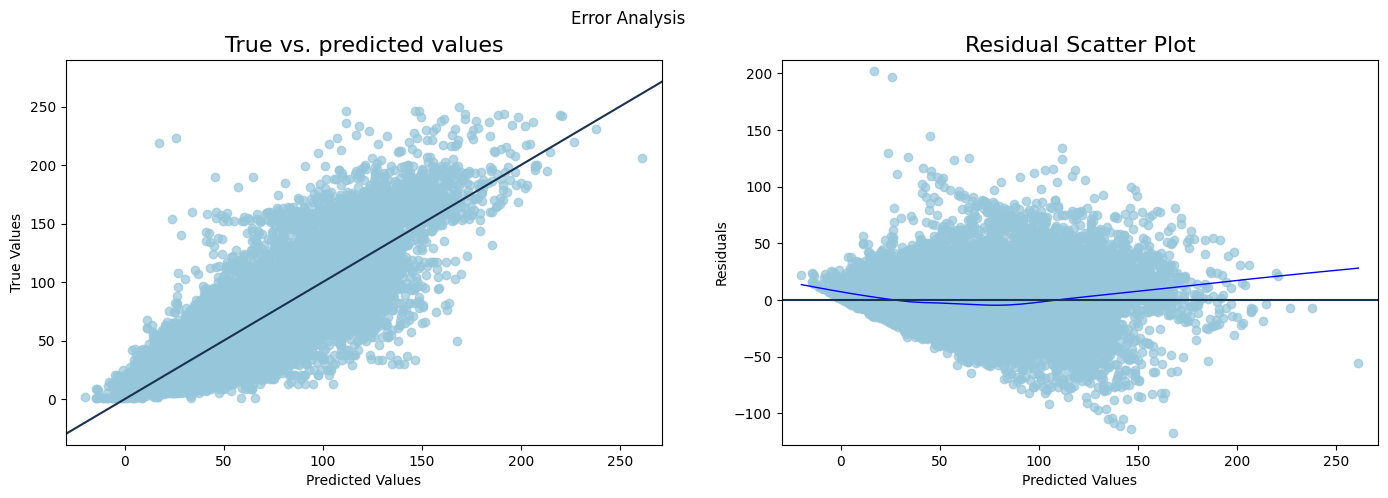

In [50]:
param_xgboost = {
    'xgb__n_estimators': [100, 300, 500],  # More trees might be better up to a point governed by diminishing returns
    'xgb__max_depth': [3, 5, 7],  # Deeper trees can capture more complex patterns
    'xgb__learning_rate': [0.01, 0.05, 0.1],  # Smaller learning rates should be paired with more trees
    'xgb__subsample': [0.7, 0.9],  # Subsampling approximately 70-90% of the data avoids overfitting
    'xgb__colsample_bytree': [0.5, 0.7]  # Using about 50-70% of columns for each tree
}

pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror'))
])


best_model_xgb, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_xgb,param_xgboost,
                                search_type='grid',reg_name='xgb',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('XGBoost GSCV', y_test, y_test_pred, df_models_rmse)


**RandomizedSearchCV**

Best score:
-23.80
Best parameters:
{'xgb__subsample': 0.7, 'xgb__n_estimators': 500, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.5}
Root Mean Squared Error: 23.60
R^2 Score: 0.75
Adj. R^2 Score: 0.74


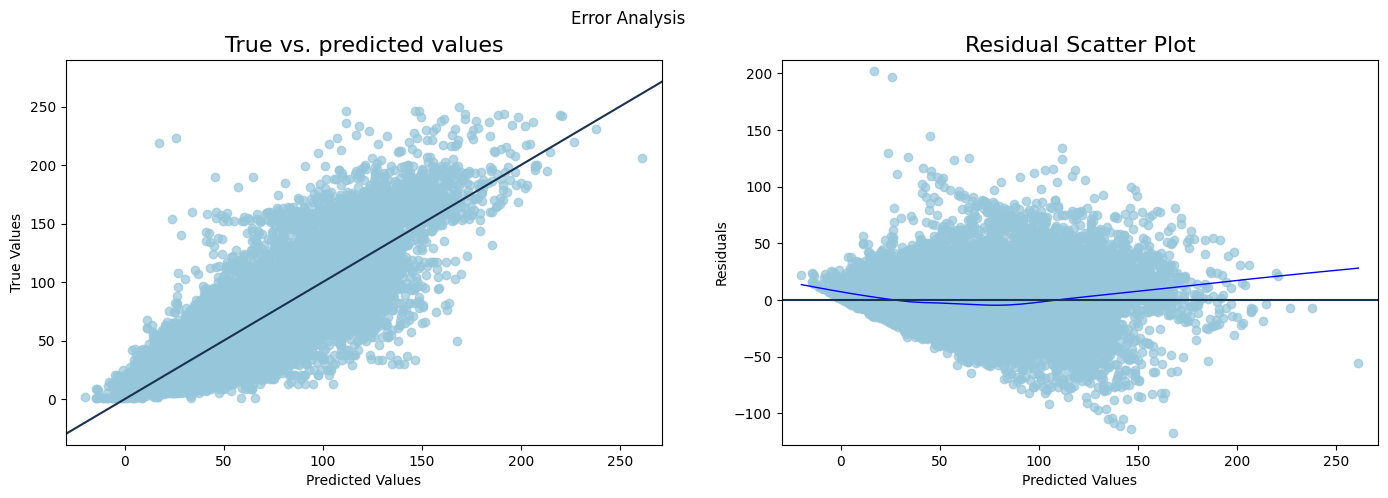

In [51]:
# Defining parameter space for grid-search
param_xgboost = {
    'xgb__n_estimators': [100, 300, 500],  # More trees might be better up to a point governed by diminishing returns
    'xgb__max_depth': [3, 5, 7],  # Deeper trees can capture more complex patterns
    'xgb__learning_rate': [0.01, 0.05, 0.1],  # Smaller learning rates should be paired with more trees
    'xgb__subsample': [0.7, 0.9],  # Subsampling approximately 70-90% of the data avoids overfitting
    'xgb__colsample_bytree': [0.5, 0.7]  # Using about 50-70% of columns for each tree
}


pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror'))
])


best_model_xgb_random, y_test_pred = train_grid_cv(
                                X_train,X_test,y_train,y_test,pipe_xgb,param_xgboost,
                                search_type='random',reg_name='xgb',scoring_func = rmse_scoring)

error_analysis_plot(y_train, y_train_pred, colorcode='#96c6da')

# Calculate RMSE and update DataFrame
df_models_rmse = save_rmse_from_cv('XGBoost RSCV', y_test, y_test_pred, df_models_rmse)


<Figure size 1000x1000 with 0 Axes>

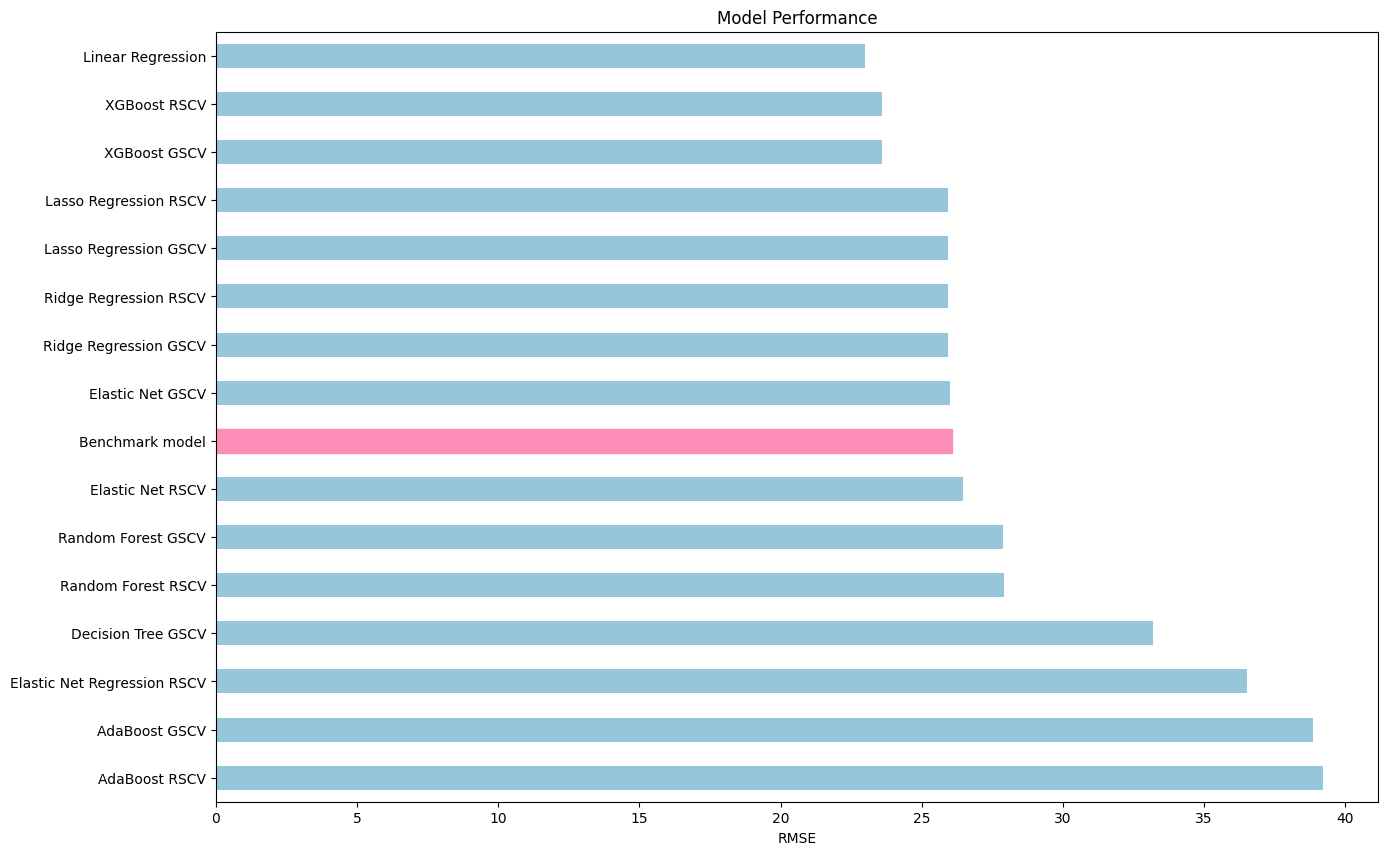

In [52]:
# Sort the RMSE values in descending order
sorted_rmse = df_models_rmse.sort_values(by='RMSE', ascending=False)

# Plotting without a legend
plt.figure(figsize=(10, 10))
ax = sorted_rmse.plot(kind='barh', x='Model', y='RMSE', color="#96c6da", legend=False, title='Model Performance')

# Extract the bars from the AxesSubplot
bars = ax.patches

# Highlight the specific bar for 'Benchmark model'
for bar, model in zip(bars, sorted_rmse['Model']):
    if model == 'Benchmark model':
        bar.set_color('#fb8db8')  # Change color for 'Benchmark model'
        
plt.xlabel('RMSE')
plt.ylabel('')
plt.savefig('../images/model_performance_comparison.png', transparent=True, bbox_inches='tight')
plt.show()

## Final product

Typically, for PM2.5, the categories might follow a scale similar to this, which is broadly aligned with international guidelines such as those from the World Health Organization (WHO) or the U.S. Environmental Protection Agency (EPA):

1) Excellent (0-12 µg/m³): Air quality is considered ideal, with virtually no risk posed by air pollution.
2) Good (12.1-35.4 µg/m³): Air quality is satisfactory, and pollution poses little or no risk.
3) Moderate (35.5-55.4 µg/m³): Air quality is acceptable; however, there may be a concern for some people who are unusually sensitive to air pollution.
4) Poor (55.5-150.4 µg/m³): Everyone may begin to experience health effects; members of sensitive groups may experience more serious health effects.
5) Very Poor (150.5-250.4 µg/m³): Health alert: everyone may experience more serious health effects.
6) Severe (over 250.5 µg/m³): Health warnings of emergency conditions; the entire population is more likely to be affected.

In [53]:
# Create DataFrame from the list
df = pd.DataFrame(y_test_pred, columns=['y_test_pred'])

# Define the bins and labels for the air quality
bins = [0, 12, 35.4, 55.4, 150.4, 250.4, float('inf')]
labels = ['Excellent', 'Good', 'Moderate', 'Poor', 'Very Poor', 'Severe']

# Categorize the data into air quality categories
df['air_quality'] = pd.cut(df['y_test_pred'], bins=bins, labels=labels, right=False)

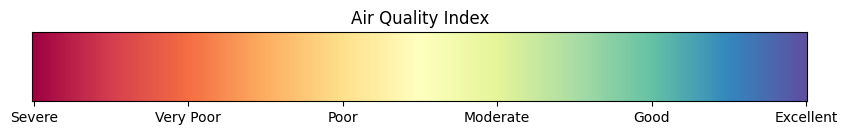

In [54]:
# Define air quality categories
categories = ['Excellent', 'Good', 'Moderate', 'Poor', 'Very Poor', 'Severe']
categories.reverse()

# Create a color palette from a continuous colormap in seaborn
palette = sns.color_palette("Spectral", as_cmap=True)

# Setup the figure and axis for larger display
fig, ax = plt.subplots(figsize=(10, 0.9))

# Create a continuous gradient bar
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=palette)

# Remove y-axis marks and labels
ax.set_yticks([])

# Set x-tick positions and labels to correspond to the categories
# Ensuring the number of tick positions matches the number of labels
tick_positions = np.linspace(0, 256 - 1, len(categories))
ax.set_xticks(tick_positions)
ax.set_xticklabels(categories)

# Set axis labels and title
# ax.set_xlabel('Air Quality Index')
plt.title('Air Quality Index')
plt.savefig('../images/air_quality_index.png', transparent=True, bbox_inches='tight')
plt.show()
